<img src = "https://freepngimg.com/download/python_logo/7-2-python-logo-free-download-png-thumb.png" width="50"> </p>
*Python 3.10.2*
***
# <font size="5">*Alexander A. Nazarov, 2023*
### <center> <font size="6"> ***Анализ таблиц сопряженности средствами Python.<br>Часть 1. Визуализация*** </p>
### <center> <font size="6"> ***Analysis of contingency tables using Python.<br>Part 1. Vizualization***
***

In [1]:
import time
start_time_0 = time.time()

Подключение модулей и библиотек:

In [2]:
# Стандартные модули и библиотеки

import os    # загрузка модуля для работы с операционной системой
import sys
import platform
print('{:<35}{:^0}'.format("Текущая версия Python: ", platform.python_version()), '\n')

import math
from math import *    # подключаем все содержимое модуля math, используем без псевдонимов

import numpy as np
#print ("Текущая версия модуля numpy: ", np.__version__)
print('{:<35}{:^0}'.format("Текущая версия модуля numpy: ", np.__version__))
from numpy import nan

import scipy as sci
print('{:<35}{:^0}'.format("Текущая версия модуля scipy: ", sci.__version__))
import scipy.stats as sps

import pandas as pd
print('{:<35}{:^0}'.format("Текущая версия модуля pandas: ", pd.__version__))

import matplotlib as mpl
print('{:<35}{:^0}'.format("Текущая версия модуля matplotlib: ", mpl.__version__))
import matplotlib.pyplot as plt
from matplotlib.ticker import IndexLocator

import seaborn as sns
print('{:<35}{:^0}'.format("Текущая версия модуля seaborn: ", sns.__version__))

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.descriptivestats import Description
print('{:<35}{:^0}'.format("Текущая версия модуля statsmodels: ", sm.__version__))

import statistics as stat    # module 'statistics' has no attribute '__version__'

import sympy as sym
print('{:<35}{:^0}'.format("Текущая версия модуля sympy: ", sym.__version__))

# Setting the accuracy
DecPlace = 4    # number of decimal places - число знаков после запятой

# Numpy settings
np.set_printoptions(precision = DecPlace, 
                    floatmode='fixed'
                    )

# Pandas settings
pd.set_option('display.max_colwidth', None)    # текст в ячейке отражался полностью вне зависимости от длины
#pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.float_format', lambda x: ('%.'+str(DecPlace)+'f') % x)

# Настройки seaborn
sns.set_style("darkgrid")
sns.set_context(context='paper', font_scale=1, rc=None)    # 'paper', 'notebook', 'talk', 'poster', None

# Настройки Mathplotlib
f_size = 8    # пользовательская переменная для задания базового размера шрифта
plt.rcParams['figure.titlesize'] = f_size + 12    # шрифт заголовка
plt.rcParams['axes.titlesize'] = f_size + 10      # шрифт заголовка
plt.rcParams['axes.labelsize'] = f_size + 6       # шрифт подписей осей
plt.rcParams['xtick.labelsize'] = f_size + 4      # шрифт подписей меток
plt.rcParams['ytick.labelsize'] = f_size + 4
plt.rcParams['legend.fontsize'] = f_size + 6      # шрифт легенды
plt.rcParams['text.usetex'] = False    # поддержка TeX

Текущая версия Python:             3.10.2 

Текущая версия модуля numpy:       1.24.3
Текущая версия модуля scipy:       1.8.0
Текущая версия модуля pandas:      1.4.1
Текущая версия модуля matplotlib:  3.5.1
Текущая версия модуля seaborn:     0.11.2
Текущая версия модуля statsmodels: 0.13.5
Текущая версия модуля sympy:       1.9


In [3]:
# Пользовательские модули и библиотеки

Text1 = os.getcwd()    # вывод пути к текущему каталогу
#print(f"Текущий каталог: {Text1}")

sys.path.insert(1, "D:\SKILL FACTORY\REPOSITORY\MyModulePython")

from my_module__stat import *

Прочие настройки:

In [4]:
# Константы
INCH = 25.4    # мм/дюйм
DecPlace = 6    # number of decimal places - число знаков после запятой
MY_PATH = "D:\\SKILL FACTORY\\REPOSITORY\\DataScience-Different projects\\MY WORK\\"
#print(chr(92))   #ASCII-код символа

Доверительная вероятность и уровень значимости:

In [5]:
p_level = 0.95
a_level = 1 - p_level   

### <center> <font size="6"> <u>***АКТУАЛЬНОСТЬ ТЕМЫ***</u>

Категориальные данные имеет огромное значение в DataScience. Как справедливо заметили авторы в [1], мы живем в мире категорий: информация может быть сформирована в категориальном виде в самых различных областях - от диагноза болезни до результатов социологического опроса.

Частным случаем анализа категориальных данных является анализ **таблиц сопряженности (contingency tables)**, в которые сводятся значения двух или более категориальных переменных.

Однако, прежде чем написать про статистический анализ таблиц сопряженности, остановимся на вопросах их **визуализации**. Казалось бы, об этом уже написано немало - есть статьи про графические возможности **python**, есть огромное количество информации и примеров с программным кодом. Однако, как всегда имеются нюансы - в процессе исследования возникают вопросы как с выбором средств визуализации, так и с настройкой инструментов **python**. В общем, есть о чем поговорить...

В данном обзоре мы рассмотрим следующие способы визуализации таблиц сопряженности:
1. Трехмерные гистограммы.
2. Мозаичные диаграммы.
3. Столбчатые диаграммы и графики взаимодействия частот.
4. Графики "тепловой карты" (heatmap).

Конечно, этот список не исчерпывающий (в этой области огромное поле деятельности - можно ознакомиться, например, здесь https://hr-portal.ru/statistica/gl7/gl7.php) - но мы остановимся на выбранных способах, ибо нельзя объять необъятное, а данный перечень охватывает достаточный набор инструментов для использования на практике. Каждый специалист волен сам выбирать инструменты для работы себе по душе.

#### <u>***Применение пользовательских функций***</u>

Как и в предыдущих обзорах, здесь будут использованы несколько пользовательских функций для решения разнообразных задач. Все эти функции созданы для облегчения работы и уменьшения размера программного кода. Данные функции загружается из пользовательского модуля **my_module__stat.py**, который доступен в моем репозитории на GitHub (https://github.com/AANazarov/MyModulePython).

Вот перечень данных функций:
* **df_detection_values** - функция служит для первичной обработки пропусков в **DataFrame**: визуализирует пропуски на тепловой карте (**heatmap**) и определяет их количество.

Ряд пользовательских функций мы создаем в процессе данного обзора (они тоже включена в пользовательский модуль **my_module__stat.py**):
* **graph_contingency_tables_hist_3D** - функция для визуализации категориальных данных: построение трехмерных гистограмм;
* **graph_contingency_tables_mosaicplot_sm** - функция для визуализации категориальных данных: построение мозаичных диаграмм;
* **make_color_mosaicplot_dict** - функция формирует словарь (dict) для задания цветовых свойств мозаичной диаграммы, является вспомогательной для функции **graph_contingency_tables_mosaicplot_sm**;
* **graph_contingency_tables_bar_freqint** - функция для визуализации категориальных данных: построение столбчатых диаграмм и графиков взаимодействия частот;
* **graph_contingency_tables_heatmap** - функция для визуализации категориальных данных: построение графика "тепловой карты".

### <center> <font size="6"> <u>***ВИЗУАЛИЗАЦИЯ ТАБЛИЦ СОПРЯЖЕННОСТИ***</u>

Вначале мы сформируем пользовательские функции для визуализации, а затем рассмотрим их применение на примере.

#### <u>***Трехмерные гистограммы***</u>

**Трехмерные гистограммы** являются очень выигрышными в визуальном плане, но, на мой взгляд, уступают в аналитическом значении мозаичным или столбчатым диаграммам. Их реализации в **python** выполняется с помощью функции **mpl_toolkits.mplot3d.axes3d.Axes3D.bar3d** (https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.bar3d.html); для получения нормального визуального изображения требуется настройка разнообразных параметров (подписей меток осей, расстояния между метками и осями и пр.); подробнее можно также ознакомится здесь: https://matplotlib.org/stable/gallery/mplot3d/3d_bars.html, https://matplotlib.org/stable/gallery/mplot3d/hist3d.html#, https://coderslegacy.com/python/3d-bar-chart-matplotlib/, https://pythonprogramming.net/3d-bar-chart-matplotlib-tutorial/.

In [6]:
def graph_contingency_tables_hist_3D(
    data_df_in: pd.core.frame.DataFrame = None,
    data_XY_list_in: list = None,
    title_figure = None, title_figure_fontsize = 14,
    title_axes = None, title_axes_fontsize = 16,
    rows_label = None, cols_label = None, vertical_label = None, label_fontsize = 14, 
    rows_ticklabels_list = None, cols_ticklabels_list = None,
    tick_fontsize = 11, rows_tick_rotation = 0, cols_tick_rotation = 0, 
    legend = None, legend_fontsize = 14,
    labelpad = 20,
    color=None,
    tight_layout=True,
    graph_size = (297/INCH, 210/INCH),
    file_name = None):
    
    """Функция для визуализации категориальных данных: построение трехмерных гистограмм

    Args:
        data_df_in (pd.core.frame.DataFrame, optional): Массив исходных данных (тип - dataframe). Defaults to None.
        data_XY_list_in (list, optional):               Массив исходных данных (тип - list). Defaults to None.
        title_figure (_type_, optional):                Заголовок рисунка (Figure). Defaults to None.
        title_figure_fontsize (int, optional):          Размер шрифта заголовка рисунка (Figure). Defaults to 14.
        title_axes (_type_, optional):                  Заголовок области рисования (Axes). Defaults to None.
        title_axes_fontsize (int, optional):            Размер шрифта заголовка области рисования (Axes). Defaults to 16.
        rows_label (_type_, optional):                  Подпись оси (по срокам). Defaults to None.
        cols_label (_type_, optional):                  Подпись оси (по столбцам). Defaults to None.
        vertical_label (_type_, optional):              Подпись вертикальной оси. Defaults to None.
        label_fontsize (int, optional):                 Размер шрифта подписей осей. Defaults to 14.
        rows_ticklabels_list (_type_, optional):        Список меток для оси (по строкам). Defaults to None.
        cols_ticklabels_list (_type_, optional):        Список меток для оси (по столбцам). Defaults to None.
        tick_fontsize (int, optional):                  Размер шрифта меток осей. Defaults to 11.
        rows_tick_rotation (int, optional):             Угол поворота меток для оси (по строкам). Defaults to 0.
        cols_tick_rotation (int, optional):             Угол поворота меток для оси (по столбцам). Defaults to 0.
        legend (_type_, optional):                      Текст легенды. Defaults to None.
        legend_fontsize (int, optional):                Размер шрифта легенды. Defaults to 14.
        labelpad (int, optional):                       Расстояние между осью и метками. Defaults to 20.
        color (_type_, optional):                       Цвет графика. Defaults to None.
        tight_layout (bool, optional):                  Автоматическая настройка плотной компоновки графика (да/нет, True/False). Defaults to True.
        graph_size (tuple, optional):                   Размера графика. Defaults to (297/INCH, 210/INCH).
        file_name (_type_, optional):                   Имя файла для сохранения на диске. Defaults to None.
    """
    
    
    # создание рисунка (Figure) и области рисования (Axes)
    fig = plt.figure(figsize=graph_size)
    ax = plt.axes(projection = "3d")
    #ax = fig.gca(projection='3d')
    fig.suptitle(title_figure, fontsize = title_figure_fontsize)
    ax.set_title(title_axes, fontsize = title_axes_fontsize)
        
    # данные для построения графика
    if data_df_in is not None:
        data = np.array(data_df_in)
        NumOfCols = data_df_in.shape[1]
        NumOfRows = data_df_in.shape[0]
    else:
        data = np.array(data_XY_list_in)
        NumOfCols = np.shape(data)[1]
        NumOfRows = np.shape(data)[0]
                
    # координаты точки привязки столбцов
    xpos = np.arange(0, NumOfCols, 1)
    ypos = np.arange(0, NumOfRows, 1)
        
    # формируем сетку координат
    xpos, ypos = np.meshgrid(xpos + 0.5, ypos + 0.5)
    xpos = xpos.flatten()
    ypos = ypos.flatten()
    
    # инициализируем для zpos нулевые значение, чтобы столбцы начинались с нуля
    zpos = np.zeros(NumOfCols * NumOfRows)
        
    # формируем ширину и глубину столбцов
    dx = np.ones(NumOfRows * NumOfCols) * 0.5
    dy = np.ones(NumOfCols * NumOfRows) * 0.5
        
    # формируем высоту столбцов
    dz = data.flatten()
            
    # построение трехмерного графика
    if not color:
        ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
    else:
        ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=color)
            
    # подписи осей
    x_label = cols_label if cols_label else ''
    y_label = rows_label if rows_label else ''
    z_label = vertical_label if vertical_label else ''
    
    ax.set_xlabel(x_label, fontsize = label_fontsize)
    ax.set_ylabel(y_label, fontsize = label_fontsize)
    ax.set_zlabel(z_label, fontsize = label_fontsize)
    
    # метки осей
    x_ticklabels_list = cols_ticklabels_list if cols_ticklabels_list \
        else list(data_df.columns) if (data_df is not None) else ''
    y_ticklabels_list = rows_ticklabels_list if rows_ticklabels_list \
        else list(data_df.index) if data_df is not None else ''
    
    # форматирование меток осей (https://matplotlib.org/stable/api/ticker_api.html)
    ax.xaxis.set_major_locator(IndexLocator(1.0, 0.25))
    ax.yaxis.set_major_locator(IndexLocator(1.0, 0.25))
        
    # устанавливаем метки осей
    ax.set_xticklabels(x_ticklabels_list, fontsize = tick_fontsize, rotation=rows_tick_rotation)
    ax.set_yticklabels(y_ticklabels_list, fontsize = tick_fontsize, rotation=cols_tick_rotation)
    
    # расстояние между подписями осей и метками осей
    ax.xaxis.labelpad = labelpad
    ax.yaxis.labelpad = labelpad
    
    # легенда
    if legend:
        b1 = plt.Rectangle((0, 0), 1, 1)
        ax.legend([b1], [legend], prop={'size': legend_fontsize})
        
    # автоматическая настройка плотной компоновки графика
    if tight_layout:
        fig.tight_layout()
        
    # вывод графика
    plt.show()
    if file_name:
        fig.savefig(file_name, orientation = "portrait", dpi = 300)
        
    return

#### <u>***Мозаичные диаграммы***</u>

**Мозаичные диаграммы (диаграммы Маримекко)** эффективны как в визуальном, так и в аналитическом плане. Их реализации в **python** выполняется с помощью функции **statsmodels.graphics.mosaicplot.mosaic** (https://www.statsmodels.org/dev/generated/statsmodels.graphics.mosaicplot.mosaic.html); для получения нормального визуального изображения требуется весьма своеобразная настройка параметров, в частности задание свойств цветов графика выполняется с помощью специального словаря (dict), для этого мы формируем пользовательскую функцию **make_color_mosaicplot_dict**.

Можно, конечно, сформировать мозаичную диаграмму из обычной столбчатой диаграммы (см., например, https://towardsdatascience.com/marimekko-charts-with-pythons-matplotlib-6b9784ae73a1), но здесь мы рассматривать этот способ не будем.

In [7]:
def graph_contingency_tables_mosaicplot_sm(
    data_df_in: pd.core.frame.DataFrame = None,
    data_XY_list_in: list = None,
    properties: dict = {},
    labelizer: bool = True,
    title_figure = None, title_figure_fontsize = 12,
    title_axes = None, title_axes_fontsize = 16,
    x_label = None, y_label = None, label_fontsize = 14, 
    x_ticklabels_list = None, y_ticklabels_list = None,
    x_ticklabels: bool = True, y_ticklabels: bool = True,
    #tick_fontsize = 11,
    tick_label_rotation = 0,
    legend_list = None, legend_fontsize = 11,
    text_fontsize = 16,
    gap = 0.005,
    horizontal: bool = True,
    statistic: bool = True,
    tight_layout=True,
    graph_size = (297/INCH, 210/INCH),
    file_name = None):
    
    """Функция для визуализации категориальных данных: построение мозаичных диаграмм

    Args:
        data_df_in (pd.core.frame.DataFrame, optional): Массив исходных данных (тип - DataFrame). Defaults to None.
        data_XY_list_in (list, optional):               Массив исходных данных (тип - list). Defaults to None.
        properties (dict, optional):                    Функция возвращает словарь свойств плиток графика (цвет, штриховка и пр.). Defaults to {}.
        labelizer (bool, optional):                     Функция генерирует текст для отображения в центре каждой плитки графика. Defaults to True.
        title_figure (_type_, optional):                Заголовок рисунка (Figure). Defaults to None.
        title_figure_fontsize (int, optional):          Размер шрифта заголовка рисунка (Figure). Defaults to 12.
        title_axes (_type_, optional):                  Заголовок области рисования (Axes). Defaults to None.
        title_axes_fontsize (int, optional):            Размер шрифта заголовка области рисования (Axes). Defaults to 16.
        x_label (_type_, optional):                     Подпись оси OX. Defaults to None.
        y_label (_type_, optional):                     Подпись оси OY. Defaults to None.
        label_fontsize (int, optional):                 Размер шрифта подписей. Defaults to 14.
        x_ticklabels_list (_type_, optional):           Список меток для оси OX. Defaults to None.
        y_ticklabels_list (_type_, optional):           Список меток для оси OY. Defaults to None.
        x_ticklabels (bool, optional):                  Отображать на графике (да/нет, True/False) метки для оси OX. Defaults to True.
        y_ticklabels (bool, optional):                  Отображать на графике (да/нет, True/False) метки для оси OY. Defaults to True.
        tick_fontsize (int, optional):                  Временно заблокировано. Defaults to 11.
        tick_label_rotation (int, optional):            Угол поворота меток для оси. Defaults to 0.
        legend_list (_type_, optional):                 Список названий категорий для легенды. Defaults to None.
        legend_fontsize (int, optional):                Размер шрифта легенды. Defaults to 11.
        text_fontsize (int, optional):                  Размер шрифта подписей в центре плиток графика. Defaults to 16.
        gap (float, optional):                          Список зазоров. Defaults to 0.005.
        horizontal (bool, optional):                    Начальное направление разделения. Defaults to True.
        statistic (bool, optional):                     Применять статистическую модель для придания цвета графику (да/нет, True/False). Defaults to True.
        tight_layout (bool, optional):                  Автоматическая настройка плотной компоновки графика (да/нет, True/False). Defaults to True.
        graph_size (tuple, optional):                   Размера графика. Defaults to (297/INCH, 210/INCH).
        file_name (_type_, optional):                   Имя файла для сохранения на диске. Defaults to None.
    """
    
    # создание рисунка (Figure) и области рисования (Axes)
    fig, axes = plt.subplots(figsize=graph_size)
    fig.suptitle(title_figure, fontsize = title_figure_fontsize)
    axes.set_title(title_axes, fontsize = title_axes_fontsize)
    
    # данные для построения графика
    if data_df_in is not None:
        data_df = data_df_in.copy()
        if x_ticklabels_list:
            data_df = data_df.set_index(pd.Index(x_ticklabels_list))
    else:
        data_df = pd.DataFrame(data_XY_list_in)
        if x_ticklabels_list:
            data_df = data_df.set_index(pd.Index(x_ticklabels_list))
        if y_ticklabels_list:
            data_df.columns = y_ticklabels_list
        
    data_np = np.array(data_XY_list_in) if data_XY_list_in is not None \
        else np.array(data_df_in)
    
    # установка шрифта подписей в теле графика 
    if text_fontsize:
        plt.rcParams["font.size"] = text_fontsize
            
    # метки осей
    if data_df is not None:
        x_list = list(map(str, x_ticklabels_list)) if x_ticklabels_list \
            else list(map(str, data_df.index))
        y_list = list(map(str, y_ticklabels_list)) if y_ticklabels_list \
            else list(map(str, data_df.columns))
    else:
        x_list = list(map(str, x_ticklabels_list)) if x_ticklabels_list \
            else list(map(str, range(data_np.shape[0])))
        y_list = list(map(str, y_ticklabels_list)) if y_ticklabels_list \
            else list(map(str, range(data_np.shape[1])))
        
    if not labelizer:
        if not x_ticklabels:
            axes.tick_params(axis='x', colors='white')
        if not y_ticklabels:
            axes.tick_params(axis='y', colors='white')

    # подписи осей
    x_label = x_label if x_label else ''
    y_label = y_label if y_label else ''
        
    axes.set_xlabel(x_label, fontsize = label_fontsize)
    axes.set_ylabel(y_label, fontsize = label_fontsize)            
            
                
    # формируем словарь (dict) data
    data_dict = {}
    for i, x in enumerate(x_list):
        for j, y in enumerate(y_list):
            data_dict[(x, y)] = data_np[i, j]
    print(f'data_dict = \n{data_dict}')
            
    # формируем словарь (dict) labelizer и функцию labelizer_func
    labelizer_dict = {}
    for i, x in enumerate(x_list):
        for j, y in enumerate(y_list):
            labelizer_dict[(x, y)] = data_np[i, j] if labelizer else ''
    labelizer_func = lambda k: labelizer_dict[k]  
    
    # построение графика
    from statsmodels.graphics.mosaicplot import mosaic
    mosaic(data_dict,
           title=title_axes,
           statistic=statistic,
           ax=axes,
           horizontal=horizontal,
           gap=gap,
           label_rotation=tick_label_rotation,
           #axes_label=False,
           labelizer=labelizer_func,
           properties=properties)
            
    # легенда
    if legend_list:
        axes.legend(legend_list,
                    bbox_to_anchor=(1, 0.5),
                    loc="center left",
                    #mode="expand",
                    ncol=1)
        
    # автоматическая настройка плотной компоновки графика
    if tight_layout:
        fig.tight_layout()
        
    # вывод графика
    plt.show()
    if file_name:
        fig.savefig(file_name, orientation = "portrait", dpi = 300)
    
    # возврат размера шрифта подписей в теле графика по умолчанию
    if text_fontsize:
        plt.rcParams["font.size"] = 10
            
    return

#### <font size="4"> ***Настройка цвета в мозаичных диаграммах***

Настройку цвета в мозаичных диаграммах можно выполнить двумя способами:
1. С помощью функции - предпочтительно для таблиц 2х2.
2. С помощью словаря (dict).

Оба этих способа мы рассмотрим далее. 

С помощью словаря можно задать индивидуально цвет каждой плитки диаграммы, или настроить цвет отдельных строк или столбцов. Для формирования словаря будем применять пользовательскую функцию **make_color_mosaicplot_dict**:

In [8]:
def make_color_mosaicplot_dict(
        rows_list, cols_list, 
        props_dict_rows=None,
        props_dict_cols=None):
    
    """Функция формирует словарь свойств плиток мозаичного графика (цвет, штриховка и пр.) для функции graph_contingency_tables_mosaicplot_sm

    Args:
        rows_list (_type_):                 Список категорий (по строкам)
        cols_list (_type_):                 Список категорий (по столбцам)
        props_dict_rows (_type_, optional): Словарь цветовых свойств категорий (по строкам). Defaults to None.
        props_dict_cols (_type_, optional): Словарь цветовых свойств категорий (по столбцам). Defaults to None.

    Returns:
        _type_: словарь свойств плиток мозаичного графика (цвет, штриховка и пр.) для функции graph_contingency_tables_mosaicplot_sm
    """
    
    result = {}
    rows = list(map(str, rows_list))
    cols = list(map(str, cols_list))
    
    if props_dict_rows:
        for col in cols:
            for row in rows:
                result[(col, row)] = {'facecolor': props_dict_rows[row]}
    
    if props_dict_cols:
        for col in cols:
            for row in rows:
                result[(col, row)] = {'facecolor': props_dict_cols[col]}
    
    return result    

#### <u>***Столбчатая диаграмма и графики взаимодействия частот***</u>

Старая добрая столбчатая диаграмма **pandas.DataFrame.plot.bar** (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) будет более эффективной, если объединить график абсолютных частот, график относительных частот и график взаимодействия частот.

На **графиках взаимодействия частот** следует остановиться отдельно. Считается, что это способ экспресс-оценки значимости связей между категориальными переменными (чем больше наклон линий на графике, тем сильнее связь; горизонтальная линия означает полное отсутствие связи), но наиболее эффективным этот график будет для таблиц сопряженности 2х2 (подробнее об этом - см. например, [3], https://cyberleninka.ru/article/n/razrabotka-vizualnogo-metoda-issledovaniya-zavisimosti-kategorialnyh-peremennyh-na-osnove-tablits-sopryazhennosti/viewer). Разумеется, подтверждать оценку значимости нужно проверкой статистических гипотез.

In [9]:
def graph_contingency_tables_bar_freqint(
    data_df_in: pd.core.frame.DataFrame = None,
    data_XY_list_in: list = None,
    graph_inclusion='arf',
    title_figure=None, title_figure_fontsize=14, title_axes_fontsize=11,
    x_label = None, y_label = None, label_fontsize = 11, 
    x_ticklabels_list = None, y_ticklabels_list = None, #tick_fontsize = 11,
    color = None,
    tight_layout=True,
    result_output=False,
    graph_size=None,
    file_name=None):
    
    """Функция для визуализации категориальных данных: построение столбчатых диаграмм и графиков взаимодействия частот

    Args:
        data_df_in (pd.core.frame.DataFrame, optional): Массив исходных данных (тип - DataFrame). Defaults to None.
        data_XY_list_in (list, optional):               Массив исходных данных (тип - list). Defaults to None.
        graph_inclusion (str, optional):                Параметр, определяющий перечень графиков, которые строит функция:
                                                            'a' - столбчатая диаграмма (в абсолютных частотах)
                                                            'r' - столбчатая диаграмма (в относительных частотах)
                                                            'f' - график взаимодействия частот
                                                            Defaults to 'arf'.
        title_figure (_type_, optional):                Заголовок рисунка (Figure). Defaults to None.
        title_figure_fontsize (int, optional):          Размер шрифта заголовка рисунка (Figure). Defaults to 14.
        title_axes_fontsize (int, optional):            Размер шрифта заголовка области рисования (Axes). Defaults to 11.
        x_label (_type_, optional):                     Подпись оси OX. Defaults to None.
        y_label (_type_, optional):                     Подпись оси OY. Defaults to None.
        label_fontsize (int, optional):                 Размер шрифта подписей по осям_. Defaults to 11.
        x_ticklabels_list (_type_, optional):           Список меток для оси OX. Defaults to None.
        y_ticklabels_list (_type_, optional):           Список меток для оси OY. Defaults to None.
        tick_fontsize (int, optional):                  Временно заблокировано. Defaults to 11.
        color (_type_, optional):                       Список, задающий цвета для категорий. Defaults to None.
        tight_layout (bool, optional):                  Автоматическая настройка плотной компоновки графика (да/нет, True/False). Defaults to True.
        result_output (bool, optional):                 Выводить таблицу (DataFrame) c числовыми данными (да/нетб True/False). Defaults to False.
        graph_size (_type_, optional):                  Размера графика. Defaults to None.
        file_name (_type_, optional):                   Имя файла для сохранения на диске. Defaults to None.
    """
    
    # данные для построения графика
    if data_df_in is not None:
        data_df_abs = data_df_in.copy()
        if x_ticklabels_list:
            data_df_abs = data_df_abs.set_index(pd.Index(x_ticklabels_list))
        if y_ticklabels_list:
            data_df_abs.columns = y_ticklabels_list
    else:
        data_df_abs = pd.DataFrame(data_XY_list_in)
        if x_ticklabels_list:
            data_df_abs = data_df_abs.set_index(pd.Index(x_ticklabels_list))
        if y_ticklabels_list:
            data_df_abs.columns = y_ticklabels_list
    data_df_rel = None
    
    data_np = np.array(data_XY_list_in) if data_XY_list_in is not None \
        else np.array(data_df_in)
    
    # определение формы и размеров области рисования (Axes)
    count_graph = len(graph_inclusion)    # число графиков
    ax_rows = 1
    ax_cols = count_graph    # размерность области рисования (Axes)
    
    # создание рисунка (Figure) и области рисования (Axes)
    graph_size_dict = {
        1: (297/INCH*0.75, 210/INCH),
        2: (297/INCH*1.5,  210/INCH),
        3: (297/INCH*2.25, 210/INCH)}
    
    if not(graph_size):
        graph_size = graph_size_dict[count_graph]
    
    fig = plt.figure(figsize=graph_size)
    
    if count_graph == 3:
        ax1 = plt.subplot(1,3,1)
        ax2 = plt.subplot(1,3,2)
        ax3 = plt.subplot(1,3,3)
    elif count_graph == 2:
        ax1 = plt.subplot(1,2,1)
        ax2 = plt.subplot(1,2,2)
    elif count_graph == 1:
        ax1 = plt.subplot(1,1,1)
        
    # заголовок рисунка (Figure)
    fig.suptitle(title_figure, fontsize = title_figure_fontsize)
    
    # столбчатая диаграмма (абсолютные частоты)
    if 'a' in graph_inclusion:
        if color:
            data_df_abs.plot.bar(
                color = color,
                stacked=True,
                rot=0,
                legend=True,
                ax=ax1)
        else:
            data_df_abs.plot.bar(
                #color = color_list,
                stacked=True,
                rot=0,
                legend=True,
                ax=ax1)
        ax1.legend(loc='best', fontsize = 12, title=data_df_abs.columns.name)
        ax1.set_title('Absolute values', fontsize=title_axes_fontsize)
        ax1.set_xlabel(x_label, fontsize = label_fontsize)
        ax1.set_ylabel(y_label, fontsize = label_fontsize)
            
    # столбчатая диаграмма (относительные частоты)
    if 'r' in graph_inclusion:
        data_df_rel = data_df_abs.copy()
        sum_data = np.sum(data_np)
        data_df_abs.sum(axis=1)
        
        for col in data_df_rel.columns:
            data_df_rel[col] = data_df_rel[col] / data_df_abs.sum(axis=1)
        
        if color:
            data_df_rel.plot.bar(
                color = color,
                stacked=True,
                rot=0,
                legend=True,
                ax = ax1 if (graph_inclusion == 'r') or (graph_inclusion == 'rf') else ax2,
                alpha = 0.5)
        else:
            data_df_rel.plot.bar(
                #color = color,
                stacked=True,
                rot=0,
                legend=True,
                ax = ax1 if (graph_inclusion == 'r') or (graph_inclusion == 'rf') else ax2,
                alpha = 0.5)
        
        if (graph_inclusion == 'r') or (graph_inclusion == 'rf'):
            ax1.legend(loc='best', fontsize = 12, title=data_df_abs.columns.name)
            ax1.set_title('Relative values', fontsize=title_axes_fontsize)
            ax1.set_xlabel(x_label, fontsize = label_fontsize)
            ax1.set_ylabel(y_label, fontsize = label_fontsize)
        else:
            ax2.legend(loc='best', fontsize = 12, title=data_df_abs.columns.name)
            ax2.set_title('Relative values', fontsize=title_axes_fontsize)
            ax2.set_xlabel(x_label, fontsize = label_fontsize)
            ax2.set_ylabel(y_label, fontsize = label_fontsize)
                            
    # график взаимодействия частот
    if 'f' in graph_inclusion:
        if color:
            sns.lineplot(
                data=data_df_abs,
                palette = color,
                dashes=False,
                lw=3,
                #markers=['o','o'],
                markersize=10,
                ax=ax1 if (graph_inclusion == 'f') else ax3 if (graph_inclusion == 'arf') else ax2)
        else:
            sns.lineplot(
                data=data_df_abs,
                #palette = color,
                dashes=False,
                lw=3,
                #markers=['o','o'],
                markersize=10,
                ax=ax1 if (graph_inclusion == 'f') else ax3 if (graph_inclusion == 'arf') else ax2)
        
        if (graph_inclusion == 'f'):
            ax1.legend(loc='best', fontsize = 12, title=data_df_abs.columns.name)
            ax1.set_title('Graph of frequency interactions', fontsize=title_axes_fontsize)
            ax1.set_xlabel(x_label, fontsize = label_fontsize)
            ax1.set_ylabel(y_label, fontsize = label_fontsize)
        elif (graph_inclusion == 'arf'):
            ax3.legend(loc='best', fontsize = 12, title=data_df_abs.columns.name)
            ax3.set_title('Graph of frequency interactions', fontsize=title_axes_fontsize)
            ax3.set_xlabel(x_label, fontsize = label_fontsize)
            ax3.set_ylabel(y_label, fontsize = label_fontsize)
        else:
            ax2.legend(loc='best', fontsize = 12, title=data_df_abs.columns.name)
            ax2.set_title('Graph of frequency interactions', fontsize=title_axes_fontsize)
            ax2.set_xlabel(x_label, fontsize = label_fontsize)
            ax2.set_ylabel(y_label, fontsize = label_fontsize)
    
    # автоматическая настройка плотной компоновки графика
    if tight_layout:
        fig.tight_layout()
    
    # вывод графика
    plt.show()
    if file_name:
        fig.savefig(file_name, orientation = "portrait", dpi = 300)
        
    # формирование и вывод результата
    if result_output:
        data_df_abs['sum'] = data_df_abs.sum(axis=1)
        if data_df_rel is not None:
            data_df_rel['sum'] = data_df_rel.sum(axis=1)
            print('\nAbsolute values:')
            display(data_df_abs)
            print('\nRelative values:')
            display(data_df_rel)
        else:
            print('\nAbsolute values:')
            display(data_df_abs)
    
    return


#### <u>***График "тепловой карты" (heatmap)***</u>

**График "тепловой карты" (heatmap)** весьма эффективен в визуальном и аналитическом плане, он реализуется в **python** с помощью функции **seaborn.heatmap** (https://seaborn.pydata.org/generated/seaborn.heatmap.html). В зависимости от особенностей исходных данных имеет смысл строить этот график либо для абсолютных, либо для относительных частот (долей); ну и для эффективной визуализации настроить цветовую шкалу (https://matplotlib.org/stable/tutorials/colors/colormaps.html).

In [10]:
def graph_contingency_tables_heatmap(
    data_df_in: pd.core.frame.DataFrame = None,
    data_XY_list_in: list = None,
    title_figure = None, title_figure_fontsize = 12,
    title_axes = None, title_axes_fontsize = 14,
    x_label = None, y_label = None, #label_fontsize = 11, 
    x_ticklabels_list = None, y_ticklabels_list = None, #tick_fontsize = 11,
    values_type = 'absolute',
    color_map='binary',
    robust = False,
    fmt = '.0f',
    tight_layout=True,
    #result_output = False,
    graph_size = (297/INCH/2, 210/INCH/2),
    file_name = None):
    
    """Функция для визуализации категориальных данных: построение графика тепловой карты (heatmap)

    Args:
        data_df_in (pd.core.frame.DataFrame, optional): Массив исходных данных (тип - DataFrame). Defaults to None.
        data_XY_list_in (list, optional):               Массив исходных данных (тип - list). Defaults to None.
        title_figure (_type_, optional):                Заголовок рисунка (Figure). Defaults to None.
        title_figure_fontsize (int, optional):          Размер шрифта заголовка рисунка (Figure). Defaults to 12.
        title_axes (_type_, optional):                  Заголовок области рисования (Axes). Defaults to None.
        title_axes_fontsize (int, optional):            Размер шрифта заголовка области рисования (Axes). Defaults to 14.
        x_label (_type_, optional):                     Подпись оси OX. Defaults to None.
        y_label (_type_, optional):                     Подпись оси OY. Defaults to None.
        label_fontsize (int, optional):                 Временно заблокировано. Defaults to 11.
        x_ticklabels_list (_type_, optional):           Список меток для оси OX. Defaults to None.
        y_ticklabels_list (_type_, optional):           Список меток для оси OY. Defaults to None.
        tick_fontsize (int, optional):                  Временно заблокировано. Defaults to 11.
        values_type (str, optional):                    Параметр, задающий в каких частотах строится график:
                                                            абсолютные/относительные, absolute/relative.
                                                            Defaults to 'absolute'.
        color_map (str, optional):                      Цветовая карта (colormap) для графика. Defaults to 'binary'.
        robust (bool, optional):                        Если True и vmin или vmax отсутствуют, диапазон цветовой карты вычисляется
                                                            с надежными квантилями вместо экстремальных значений. Defaults to False.
        fmt (str, optional):                            Числовой формат подписей в центре плиток графика. Defaults to '.0f'.
        tight_layout (bool, optional):                  Автоматическая настройка плотной компоновки графика (да/нет, True/False). Defaults to True.
        graph_size (tuple, optional):                   Размера графика. Defaults to (297/INCH/2, 210/INCH/2).
        file_name (_type_, optional):                   Имя файла для сохранения на диске. Defaults to None.
    """
    
    # создание рисунка (Figure) и области рисования (Axes)
    fig, axes = plt.subplots(figsize=graph_size)
    fig.suptitle(title_figure, fontsize = title_figure_fontsize)
    axes.set_title(title_axes, fontsize = title_axes_fontsize)
    
    # данные для построения графика
    if data_df_in is not None:
        data_df = data_df_in.copy()
        if x_ticklabels_list:
            data_df = data_df.set_index(pd.Index(x_ticklabels_list))
        if y_ticklabels_list:
            data_df.columns = y_ticklabels_list
    else:
        data_df = pd.DataFrame(data_XY_list_in)
        if x_ticklabels_list:
            data_df = data_df.set_index(pd.Index(x_ticklabels_list))
        if y_ticklabels_list:
            data_df.columns = y_ticklabels_list
        
    data_np = np.array(data_XY_list_in) if data_XY_list_in is not None \
        else np.array(data_df_in)
    
    data_df_rel = None
    
    if values_type == 'relative':         
        data_df_rel = data_df.copy()
        sum_data = np.sum(data_np)
        data_df.sum(axis=1)
        
        for col in data_df_rel.columns:
            data_df_rel[col] = data_df_rel[col] / sum_data
        
    # построение графика
    if values_type == "absolute":
        if not robust: 
            sns.heatmap(data_df.transpose(),
                #vmin=0, vmax=1,
                linewidth=0.5,
                cbar=True,
                fmt=fmt,
                annot=True,
                cmap=color_map,
                ax=axes)
        else:
            sns.heatmap(data_df.transpose(),
                #vmin=0, vmax=1,
                linewidth=0.5,
                cbar=True,
                robust=True,
                fmt=fmt,
                annot=True,
                cmap=color_map,
                ax=axes)
    else:
        if not robust: 
            sns.heatmap(data_df_rel.transpose(),
                vmin=0, vmax=1,
                linewidth=0.5,
                cbar=True,
                fmt=fmt,
                annot=True,
                cmap=color_map,
                ax=axes)
        else:
            sns.heatmap(data_df_rel.transpose(),
                vmin=0, vmax=1,
                linewidth=0.5,
                cbar=True,
                robust=True,
                fmt=fmt,
                annot=True,
                cmap=color_map,
                ax=axes)
    
    # автоматическая настройка плотной компоновки графика
    if tight_layout:
        fig.tight_layout()
        
    # вывод графика
    plt.show()
    if file_name:
        fig.savefig(file_name, orientation = "portrait", dpi = 300)
    
    return

### <center> <font size="6"> <u>***ПРИМЕРЫ ВИЗУАЛИЗАЦИИ ТАБЛИЦ СОПРЯЖЕННОСТИ***</u>

В качестве примера рассмотрим хорошо известную всем специалистам по DataScience задачу (известную, так сказать, "в узком кругу ограниченных людей"(С) :-) ) , а именно - **задачу о "Титанике"** (https://www.kaggle.com/c/titanic).

Замечу, что мы здесь рассматриваем датасет о "Титанике" просто как пример для визуализации таблиц сопряженности, цели решать эту задачу мы здесь не ставим, поэтому выполнять визуализацию многофакторных зависимостей (например, зависимость выживаемости от класса билета, возраста и пола пассажира) не будем. Это выходит за рамки данного обзора, так что ограничимся двухфакторными зависимостями.

Настройка заголовков отчета:

In [11]:
# Общий заголовок проекта
Task_Project = 'Titanic - Machine Learning from Disaster (https://www.kaggle.com/c/titanic)'

#### <u>***Подготовка исходных данных***</u>

Скачаем с сайта https://www.kaggle.com/c/titanic и загрузим исходные данные из csv-файлов:
* тренировочный набор данных **train.csv** (содержит выборку пассажиров с известным исходом, т.е. выжил или нет);
* набор данных для тестирования **test.csv** (содержит другую выборку пассажиров без зависимой переменной).

In [12]:
train_df = pd.read_csv('data/train.csv')
display(train_df)
#display(train_df.head(), train_df.tail())
train_df.info()
train_df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.000000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.000000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.000000,C148,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
test_df = pd.read_csv('data/test.csv')
display(test_df)
#display(test_df.head(), test_df.tail())
test_df.info()
test_df.describe()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.829200,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.000000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.687500,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.662500,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.287500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.900000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Создадим рабочие копии DataFrame:

In [14]:
dataset_train_df = train_df.copy()
dataset_test_df = test_df.copy()

### <center> <u>***Пример 1: визуализация состава и структуры совокупности пассажиров***</u>

Предположим, вначале мы хотим проанализировать состав и структуру совокупности пассажиров "Титаника".

Для этого объединим оба файла исходных данных в один датасет:

In [15]:
dataset_df = pd.concat([dataset_train_df, dataset_test_df], axis=0, ignore_index=True)

display(dataset_df)
#display(dataset_df.head(), dataset_df.tail())
dataset_df.info()
dataset_df.describe()
display(dataset_df['PassengerId'].nunique())
#display(dataset_df.describe(include = ['category']))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.000000,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S
1,2,1.000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1.000000,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S
3,4,1.000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0.000000,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.900000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


1309

К слову, не всегда начинают исследование с такого анализа, наоборот, часто он выполняется как элемент дополнительного изучения отдельных закономерностей, вызвавших вопросы у исследователя. Например, несколько забегая вперед, далее при анализе факторов, влияющих на выживаемость пассажиров "Титаника", мы установим, что вероятность выжить несколько выше для пассажиров, взошедших на борт судна в порту Шербура (Cherbourg). Чтобы разобраться в причинах этого явления, придется проанализировать совокупность пассажиров в разрезе зависимости порта посадки и прочих факторов (класса билета, пола, возраста, наличия детей и т.д.). Но в данном обзоре, в целях визуализации, мы вначале все-таки остановимся на анализе состава и структуры изучаемого датасета.

#### <u>***Распределение пассажиров по классам билета (Pclass) и полу (Sex)***</u>

#### <font size="4"> ***Первичная обработка и группировка данных***

Проверим пропуски по полям **Pclass** и **Sex** с помощью графика "тепловой карты":

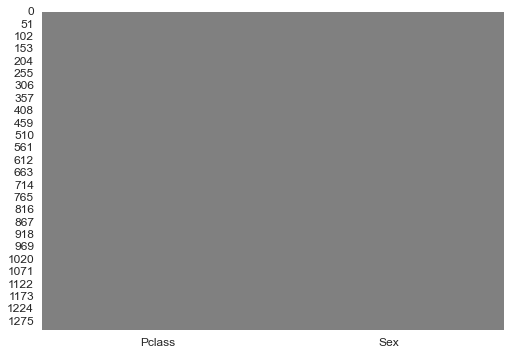

,size,detected values,percentage of detected values
Pclass,1309,0,0.000000
Sex,1309,0,0.000000


In [16]:
data_df = dataset_df.loc[:, ['Pclass', 'Sex']]
result_df, detection_values_df = df_detection_values(data_df, detection_values=[0, ' ', nan, None])
display(result_df)

<u>**Вывод:**</u> пропуски отсутствуют.

Группировка данных:

In [17]:
dataset_df_Pclass_Sex = dataset_df.pivot_table(
    values='PassengerId',
    index='Pclass',
    columns='Sex',
    aggfunc='count',
    fill_value=0,
    margins=True)

#display(dataset_df_Pclass_Sex)
print(dataset_df_Pclass_Sex)

Sex     female  male   All
Pclass                    
1          144   179   323
2          106   171   277
3          216   493   709
All        466   843  1309


#### <font size="4"> ***Визуализация с помощью трехмерной гистограммы и мозаичной диаграммы***

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticklabels_list, fontsize = tick_fontsize, rotation=rows_tick_rotation)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticklabels_list, fontsize = tick_fontsize, rotation=cols_tick_rotation)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:120: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


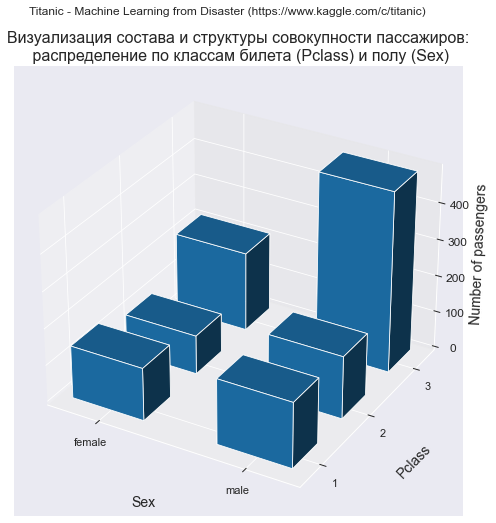

data_dict = 
{('1', 'female'): 144, ('1', 'male'): 179, ('2', 'female'): 106, ('2', 'male'): 171, ('3', 'female'): 216, ('3', 'male'): 493}


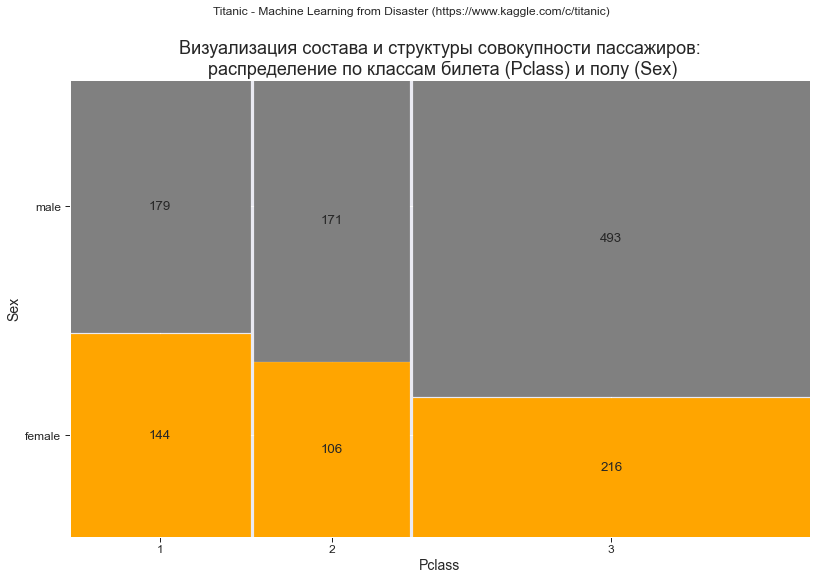

In [18]:
dataset_df_sample = dataset_df_Pclass_Sex.copy()
data_df = dataset_df_sample.iloc[:dataset_df_sample.shape[0]-1, :dataset_df_sample.shape[1]-1]

title_axes = 'Визуализация состава и структуры совокупности пассажиров:\n распределение по классам билета (Pclass) и полу (Sex)'

graph_contingency_tables_hist_3D(data_df,
                                 title_figure = Task_Project, title_figure_fontsize = 12,
                                 title_axes = title_axes, title_axes_fontsize = 16,
                                 rows_label = 'Pclass',
                                 cols_label = 'Sex',
                                 vertical_label = 'Number of passengers',
                                 #graph_size = (297/INCH*1.5, 210/INCH*1.5)
                                 )   

props_func = lambda key: {'color': 'grey' if 'male' in key else 'orange'}

graph_contingency_tables_mosaicplot_sm(
    data_df_in=data_df,
    properties=props_func,
    title_figure = Task_Project, title_figure_fontsize = 12,
    title_axes = title_axes,
    x_label = 'Pclass',
    y_label = 'Sex',
    #statistic = False,
    #graph_size = (297/INCH, 210/INCH)
    )

<u>**Вывод:**</u> доля мужчин среди пассажиров 3 класса выше, чем в 1 и 2 классе.

#### <font size="4"> ***Визуализация с помощью столбчатой диаграммы и графика взаимодействия частот***

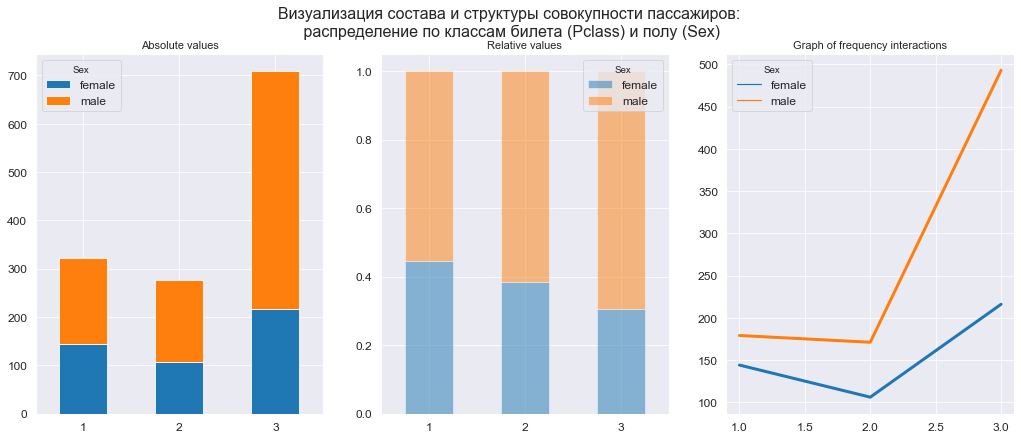


Absolute values:


Sex,female,male,sum
Pclass,,,
1,144,179,323
2,106,171,277
3,216,493,709



Relative values:


Sex,female,male,sum
Pclass,,,
1,0.445820,0.554180,1.000000
2,0.382671,0.617329,1.000000
3,0.304654,0.695346,1.000000


In [19]:
graph_contingency_tables_bar_freqint(
    data_df_in=data_df,
    graph_inclusion='arf',
    title_figure = title_axes, title_figure_fontsize = 16,
    result_output=True,
    tight_layout=False,
    graph_size=(297/INCH*1.5, 210/INCH/1.25)
    )

<u>**Вывод:**</u> график взаимодействия частот позволяет предположить наличие связи между признаками.

#### <font size="4"> ***Визуализация с помощью графика "тепловой карты" (heatmap)***

Формируем графики абсолютных и относительных (доли каждой категории в общем объеме совокупности) частот:

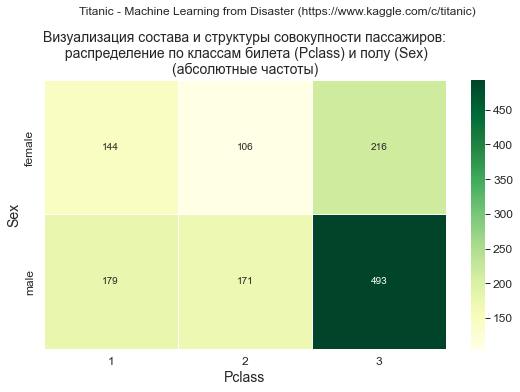

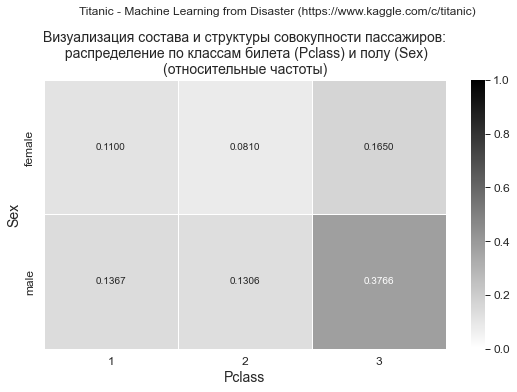

In [20]:
# абсолютные частоты
graph_contingency_tables_heatmap(
    data_df_in=data_df,
    title_figure = Task_Project, #title_figure_fontsize = 14,
    title_axes = title_axes + '\n(абсолютные частоты)', title_axes_fontsize = 14,
    #values_type = 'absolute',
    color_map='YlGn',
    graph_size=(297/INCH/1.5, 210/INCH/1.5)
    )

# относительные частоты
graph_contingency_tables_heatmap(
    data_df_in=data_df,
    title_figure = Task_Project, #title_figure_fontsize = 14,
    title_axes = title_axes + '\n(относительные частоты)', title_axes_fontsize = 14,
    values_type = 'relative',
    #color_map='YlGn',
    fmt = '.4f',
    graph_size=(297/INCH/1.5, 210/INCH/1.5)
    )

#### <u>***Распределение пассажиров по классам билета (Pclass) и возрасту (Age)***</u>

#### <font size="4"> ***Первичная обработка и группировка данных***

Так как возраст (Age) в нашем датасете есть количественная категория, трансформируем его в качественную, используя следующую периодизацию:
* ранний возраст (early age): до 3 лет;
* раннее детство (early childhood): свыше 3 до 7 лет;
* детство (childhood): свыше 7 до 13 лет;
* юность (adolescence): свыше 13 до 21 года;
* зрелость (maturity): свыше 21 до 55 лет;
* преклонный возраст (advanced age): свыше 55 до 75 лет;
* старость (old age): свыше 75 лет.

In [21]:
# функция для трансформации поля Age
def age_transform_func(age):
    age_periods_dict = {
        'early age':       3,
        'early childhood': 7,
        'childhood':       13,
        'adolescence':     21,
        'maturity':        55,
        'advanced age':    75,
        'old age':         130}
    age_scale = list(age_periods_dict.values())
    if not age or isnan(age):
        result = None
    else:
        for i, elem in enumerate(age_scale):
            if abs(age) <= elem:
                result = list(age_periods_dict.keys())[i]
                break
    return result

# добавляем в датасет поле Age period
dataset_df['Age period'] = dataset_df['Age'].apply(age_transform_func)
display(dataset_df)

# сохраняем откорректированный датасет в формате Excel (может пригодиться)
#dataset_df.to_excel('dataset_df.xlsx')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age period
0,1,0.000000,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S,maturity
1,2,1.000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C,maturity
2,3,1.000000,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S,maturity
3,4,1.000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S,maturity
4,5,0.000000,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,NaN,S,maturity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,None
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.900000,C105,C,maturity
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,maturity
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,None


Проверим пропуски по полям **Pclass** и **Age** с помощью графика "тепловой карты":

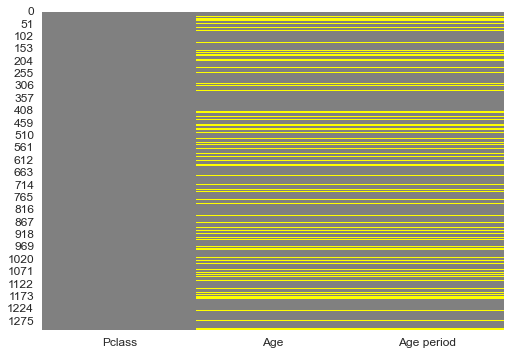

,size,detected values,percentage of detected values
Pclass,1309,0,0.000000
Age,1309,263,0.200917
Age period,1309,263,0.200917


In [22]:
data_df = dataset_df.loc[:, ['Pclass', 'Age', 'Age period']]
result_df, detection_values_df = df_detection_values(data_df, detection_values=[' ', 0, nan, None])
display(result_df)

Видим, что среди значений поля **Age** имеются пропуски, которые нужно исключить, чтобы они не исказили результаты анализа:

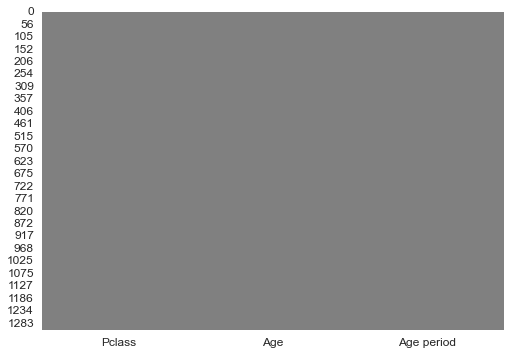

,size,detected values,percentage of detected values
Pclass,1046,0,0.000000
Age,1046,0,0.000000
Age period,1046,0,0.000000


In [23]:
# формируем список строк, подлежащих удалению
drop_labels = []
for elem in detection_values_df.index:
    if detection_values_df.loc[elem].any():
        drop_labels.append(elem)
#display(drop_labels)

# удаляем строки
dataset_df_age = dataset_df.drop(index=drop_labels)

# проверяем результат удаления
data_df = dataset_df_age.loc[:, ['Pclass', 'Age', 'Age period']]
result_df, detection_values_df = df_detection_values(data_df, detection_values=[' ', 0, nan, None])
display(result_df)

<u>**Вывод:**</u> пропуски отсутствуют.

Группировка данных:

In [24]:
dataset_df_Pclass_AgePeriod = dataset_df_age.pivot_table(
    values='PassengerId',
    index='Pclass',
    columns='Age period',
    aggfunc='count',
    fill_value=0,
    margins=True)

#display(dataset_df_Pclass_AgePeriod)
print(dataset_df_Pclass_AgePeriod)

Age period  adolescence  advanced age  childhood  early age  early childhood  \
Pclass                                                                         
1                    25            37          2          2                2   
2                    38            12          7         13                5   
3                   128             8         24         26               18   
All                 191            57         33         41               25   

Age period  maturity  old age   All  
Pclass                               
1                214        2   284  
2                186        0   261  
3                297        0   501  
All              697        2  1046  


Изменим порядок столбцов в DataFrame в соответствии с порядком увеличения возраста:

In [25]:
dataset_df_Pclass_AgePeriod = dataset_df_Pclass_AgePeriod.loc[:, ['early age', 'early childhood', 'childhood', 'adolescence', 'maturity', 'advanced age', 'old age']]
#display(dataset_df_Pclass_AgePeriod)
print(dataset_df_Pclass_AgePeriod)

Age period  early age  early childhood  childhood  adolescence  maturity  \
Pclass                                                                     
1                   2                2          2           25       214   
2                  13                5          7           38       186   
3                  26               18         24          128       297   
All                41               25         33          191       697   

Age period  advanced age  old age  
Pclass                             
1                     37        2  
2                     12        0  
3                      8        0  
All                   57        2  


#### <font size="4"> ***Визуализация с помощью трехмерной гистограммы***

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticklabels_list, fontsize = tick_fontsize, rotation=rows_tick_rotation)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticklabels_list, fontsize = tick_fontsize, rotation=cols_tick_rotation)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:120: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


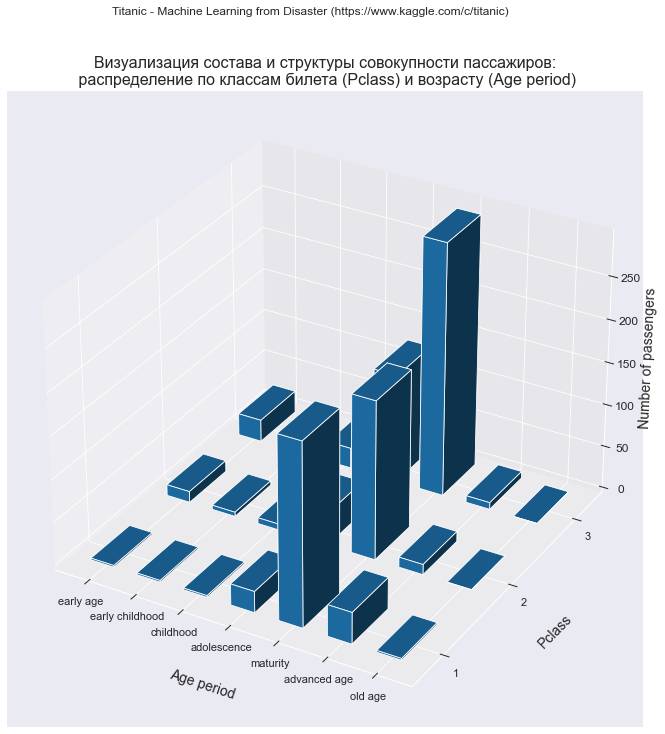

In [26]:
dataset_df_sample = dataset_df_Pclass_AgePeriod.copy()
data_df = dataset_df_sample.iloc[:dataset_df_sample.shape[0]-1, :dataset_df_sample.shape[1]]

title_axes = 'Визуализация состава и структуры совокупности пассажиров:\n распределение по классам билета (Pclass) и возрасту (Age period)'

graph_contingency_tables_hist_3D(data_df,
                                 title_figure = Task_Project, title_figure_fontsize = 12,
                                 title_axes = title_axes, title_axes_fontsize = 16,
                                 rows_label = 'Pclass',
                                 cols_label = 'Age period',
                                 vertical_label = 'Number of passengers',
                                 graph_size = (420/INCH, 297/INCH)
                                 )   

#### <font size="4"> ***Визуализация с помощью мозаичной диаграммы***

Если мы построим мозаичную диаграмму с настройками по умолчанию, получится не очень визуально эстетическое изображение - из-за того,что в нашей таблице сопряженности имеются нулевые значения, которые "сбивают в кучу" метки осей и подписи в центре плиток графика:

data_dict = 
{('1', 'early age'): 2, ('1', 'early childhood'): 2, ('1', 'childhood'): 2, ('1', 'adolescence'): 25, ('1', 'maturity'): 214, ('1', 'advanced age'): 37, ('1', 'old age'): 2, ('2', 'early age'): 13, ('2', 'early childhood'): 5, ('2', 'childhood'): 7, ('2', 'adolescence'): 38, ('2', 'maturity'): 186, ('2', 'advanced age'): 12, ('2', 'old age'): 0, ('3', 'early age'): 26, ('3', 'early childhood'): 18, ('3', 'childhood'): 24, ('3', 'adolescence'): 128, ('3', 'maturity'): 297, ('3', 'advanced age'): 8, ('3', 'old age'): 0}


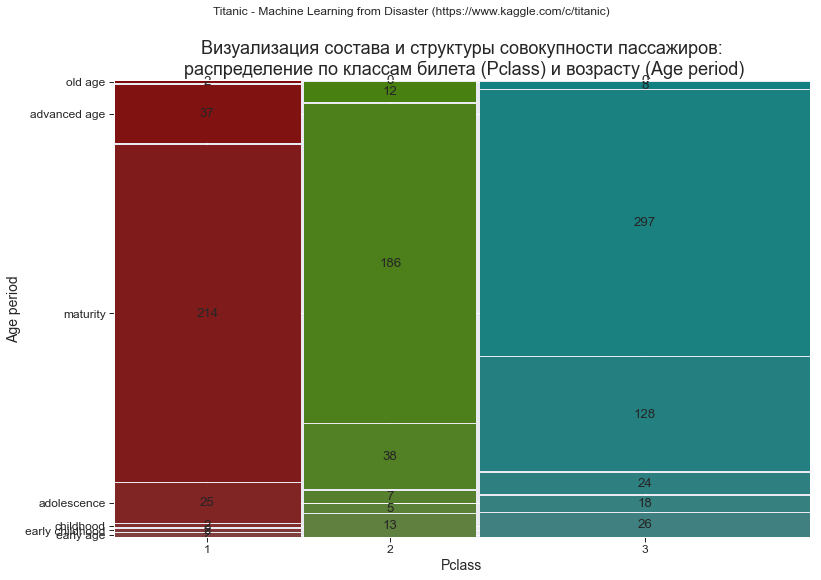

In [27]:
graph_contingency_tables_mosaicplot_sm(
    data_df_in=data_df,
    #properties=props_func,
    title_figure = Task_Project, title_figure_fontsize = 12,
    title_axes = title_axes,
    x_label = 'Pclass', y_label = 'Age period',
    statistic = False,
    #graph_size = (297/INCH, 210/INCH)
    )

Поэтому, чтобы изображение было качественным, придется поработать с настройками функции **graph_contingency_tables_mosaicplot_sm**, а именно:
* сформировать словарь **props_dict** со свойствами цветов для плиток графика: **properties=props_dict**; при этом цвета мы будем задавать из цветовой карты (colormap) **tab10** (см. https://matplotlib.org/stable/tutorials/colors/colormaps.html);
* отключить в функции подписи данных в центре плиток графика: **labelizer=False**;
* отключить в функции подпись по вертикальной оси: **y_ticklabels = False**;
* включить в функции отображение легенды: **legend_list = legend_list**.

Смысл настроек в том, что мы убираем на мозаичном графике весь текст, который "сбивается в кучу" (т.е. подписи по вертикальной оси и подписи в центре плиток графика), а вместо этого добавляем на графике легенду.

color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
props_dict_cols = {'early age': '#1f77b4', 'early childhood': '#ff7f0e', 'childhood': '#2ca02c', 'adolescence': '#d62728', 'maturity': '#9467bd', 'advanced age': '#8c564b', 'old age': '#e377c2'}

props_dict = {('1', 'early age'): {'facecolor': '#1f77b4'}, ('1', 'early childhood'): {'facecolor': '#ff7f0e'}, ('1', 'childhood'): {'facecolor': '#2ca02c'}, ('1', 'adolescence'): {'facecolor': '#d62728'}, ('1', 'maturity'): {'facecolor': '#9467bd'}, ('1', 'advanced age'): {'facecolor': '#8c564b'}, ('1', 'old age'): {'facecolor': '#e377c2'}, ('2', 'early age'): {'facecolor': '#1f77b4'}, ('2', 'early childhood'): {'facecolor': '#ff7f0e'}, ('2', 'childhood'): {'facecolor': '#2ca02c'}, ('2', 'adolescence'): {'facecolor': '#d62728'}, ('2', 'maturity'): {'facecolor': '#9467bd'}, ('2', 'advanced age'): {'facecolor': '#8c564b'}, ('2', 'old age'): {'facecolor': '#e377c2'}, ('3', 'early age'): {'facecolor': '#1f7

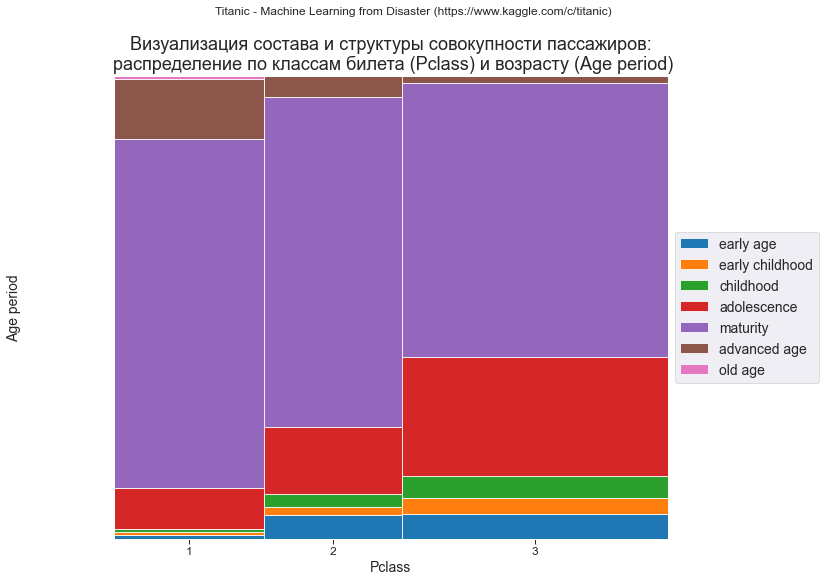

In [28]:
# формируем список цветов (из цветовой карты tab10, https://matplotlib.org/stable/tutorials/colors/colormaps.html)
legend_list = list(data_df.columns)
colors_number = len(legend_list)
color_list = []
for i in range(colors_number):
    color_list.append(mpl.colors.to_hex(plt.cm.tab10.colors[i]))
print(f'color_list = {color_list}')

# задаем привязку цветов к категориям в виде словаря (dict)
color_dict = {}
for i in range(colors_number):
    color_dict[legend_list[i]] = color_list[i]
print(f'props_dict_cols = {color_dict}')

# формируем словарь props_dict для реализации функции graph_contingency_tables_mosaicplot_sm
props_dict = make_color_mosaicplot_dict(
    rows_list=legend_list,
    cols_list=list(data_df.index),
    props_dict_rows=color_dict)
print(f'\nprops_dict = {props_dict}')  

# построение графика
graph_contingency_tables_mosaicplot_sm(
    data_df_in=data_df,
    properties=props_dict,
    labelizer=False,
    title_figure = Task_Project, title_figure_fontsize = 12,
    title_axes = title_axes,
    x_label = 'Pclass', y_label = 'Age period',
    y_ticklabels = False, 
    text_fontsize = 14,
    gap = 0,
    legend_list = legend_list,
    statistic = False,
    #graph_size = (297/INCH, 210/INCH)
    )

#### <font size="4"> ***Визуализация с помощью столбчатой диаграммы и графика взаимодействия частот***

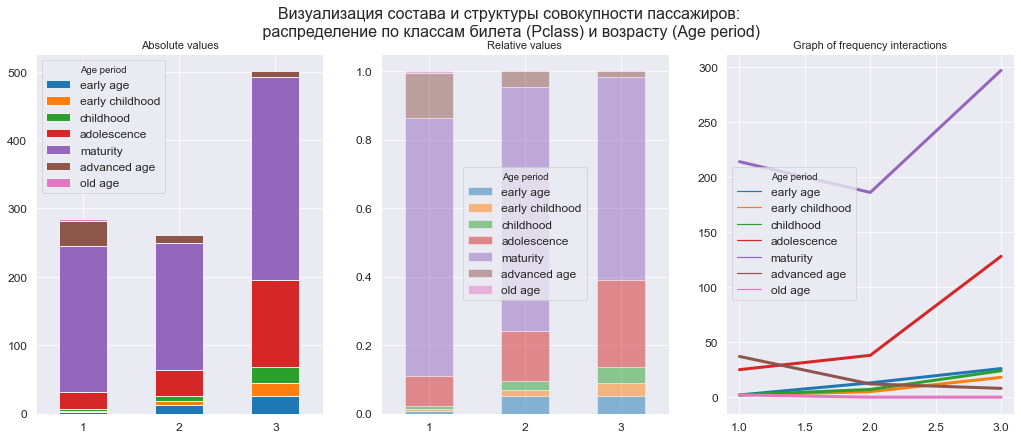


Absolute values:


Age period,early age,early childhood,childhood,adolescence,maturity,advanced age,old age,sum
Pclass,,,,,,,,
1,2,2,2,25,214,37,2,284
2,13,5,7,38,186,12,0,261
3,26,18,24,128,297,8,0,501



Relative values:


Age period,early age,early childhood,childhood,adolescence,maturity,advanced age,old age,sum
Pclass,,,,,,,,
1,0.007042,0.007042,0.007042,0.088028,0.753521,0.130282,0.007042,1.000000
2,0.049808,0.019157,0.026820,0.145594,0.712644,0.045977,0.000000,1.000000
3,0.051896,0.035928,0.047904,0.255489,0.592814,0.015968,0.000000,1.000000


In [29]:
graph_contingency_tables_bar_freqint(
    data_df_in=data_df,
    graph_inclusion='arf',
    title_figure = title_axes, title_figure_fontsize = 16,
    result_output=True,
    tight_layout=False,
    graph_size=(297/INCH*1.5, 210/INCH/1.25)
    )

#### <font size="4"> ***Визуализация с помощью графика "тепловой карты" (heatmap)***

Формируем графики абсолютных и относительных (доли каждой категории в общем объеме совокупности) частот:

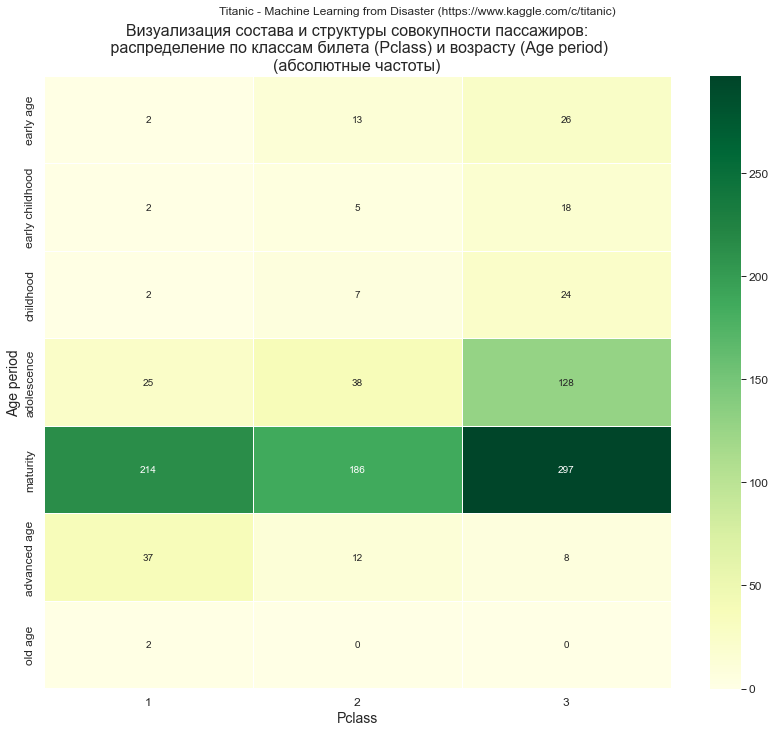

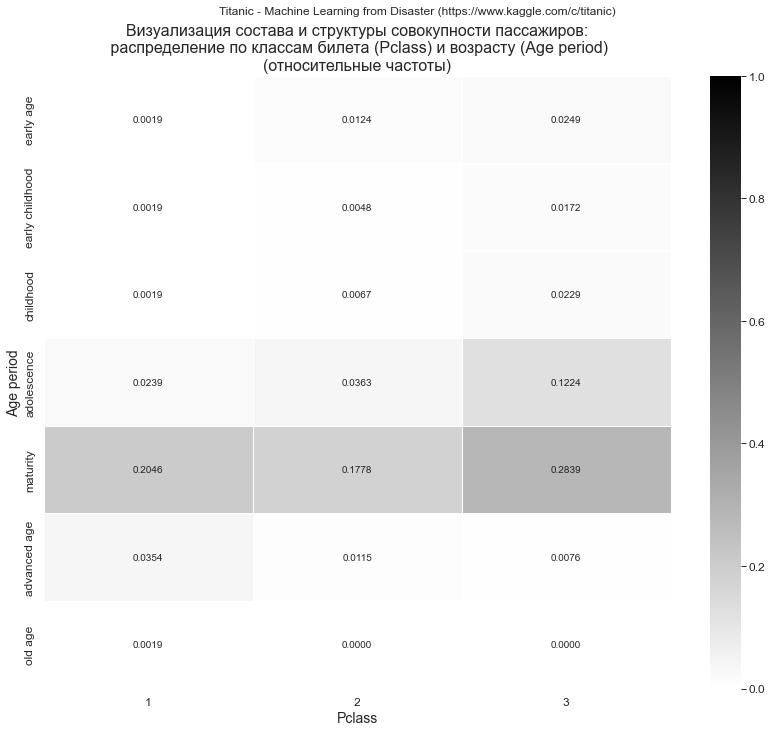

In [30]:
# абсолютные частоты
graph_contingency_tables_heatmap(
    data_df_in=data_df,
    title_figure = Task_Project, #title_figure_fontsize = 14,
    title_axes = title_axes + '\n(абсолютные частоты)', title_axes_fontsize = 16,
    #values_type = 'absolute',
    color_map='YlGn',
    graph_size=(297/INCH, 210/INCH*1.25)
    )

# относительные частоты
graph_contingency_tables_heatmap(
    data_df_in=data_df,
    title_figure = Task_Project, #title_figure_fontsize = 14,
    title_axes = title_axes + '\n(относительные частоты)', title_axes_fontsize = 16,
    values_type = 'relative',
    #color_map='YlGn',
    fmt = '.4f',
    graph_size=(297/INCH, 210/INCH*1.25)
    )

#### <u>***Распределение пассажиров по классам билета (Pclass) и порту отправления (Embarked)***</u>

#### <font size="4"> ***Первичная обработка и группировка данных***

Проверим пропуски по полям **Pclass** и **Embarked** с помощью графика "тепловой карты":

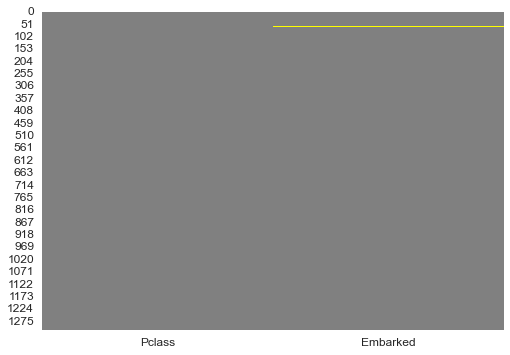

,size,detected values,percentage of detected values
Pclass,1309,0,0.000000
Embarked,1309,2,0.001528


In [31]:
data_df = dataset_df.loc[:, ['Pclass', 'Embarked']]
result_df, detection_values_df = df_detection_values(data_df, detection_values=[0, ' ', nan, None])
display(result_df)

Видим, что среди значений поля **Embarked** имеются пропуски, которые нужно исключить, чтобы они не исказили результаты анализа:

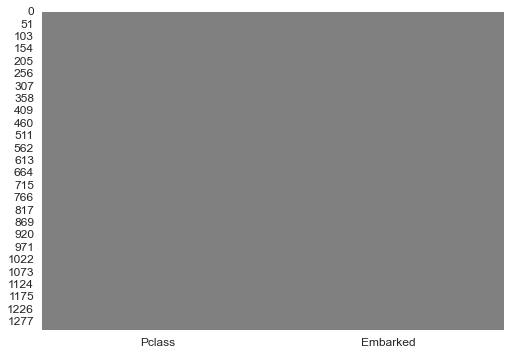

,size,detected values,percentage of detected values
Pclass,1307,0,0.000000
Embarked,1307,0,0.000000


In [32]:
# формируем список строк, подлежащих удалению
drop_labels = []
for elem in detection_values_df.index:
    if detection_values_df.loc[elem].any():
        drop_labels.append(elem)
#display(drop_labels)

# удаляем строки
dataset_df_embarked = dataset_df.drop(index=drop_labels)

# проверяем результат удаления
data_df = dataset_df_embarked.loc[:, ['Pclass', 'Embarked']]
result_df, detection_values_df = df_detection_values(data_df, detection_values=[0, ' ', nan, None])
display(result_df)

<u>**Вывод:**</u> пропуски отсутствуют.

Группировка данных:

In [33]:
dataset_df_Pclass_Embarked = dataset_df_embarked.pivot_table(
    values='PassengerId',
    index='Pclass',
    columns='Embarked',
    aggfunc='count',
    fill_value=0,
    margins=True)

#display(dataset_df_Pclass_Embarked)
print(dataset_df_Pclass_Embarked)

Embarked    C    Q    S   All
Pclass                       
1         141    3  177   321
2          28    7  242   277
3         101  113  495   709
All       270  123  914  1307


Изменим порядок столбцов в DataFrame в соответствии с порядком посадки пассажиров в портах (Southampton, Cherbourg, Queenstown):

In [34]:
dataset_df_Pclass_Embarked = dataset_df_Pclass_Embarked.loc[:, ['S', 'C', 'Q']]
#display(dataset_df_Pclass_Embarked)
print(dataset_df_Pclass_Embarked)

Embarked    S    C    Q
Pclass                 
1         177  141    3
2         242   28    7
3         495  101  113
All       914  270  123


#### <font size="4"> ***Визуализация с помощью трехмерной гистограммы***

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticklabels_list, fontsize = tick_fontsize, rotation=rows_tick_rotation)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticklabels_list, fontsize = tick_fontsize, rotation=cols_tick_rotation)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:120: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


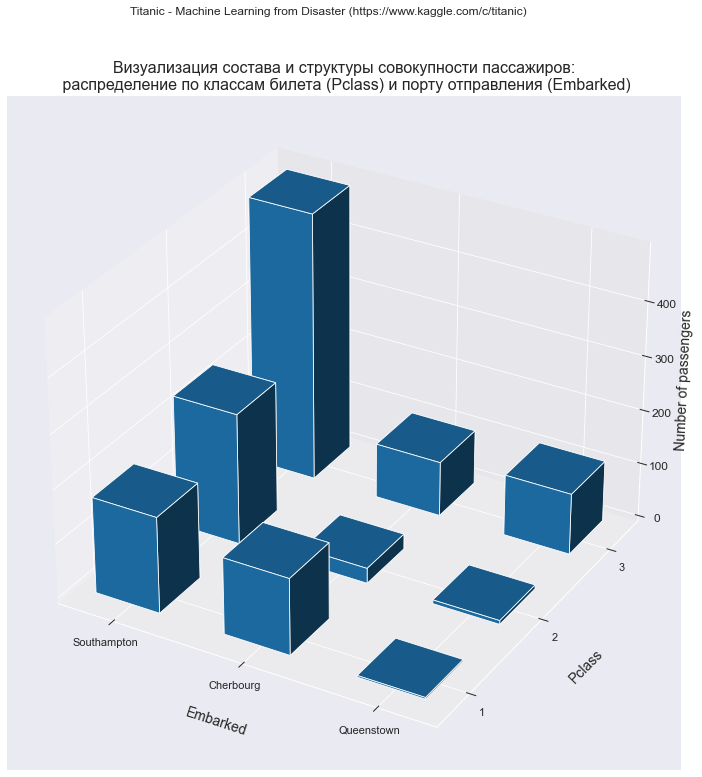

In [35]:
dataset_df_sample = dataset_df_Pclass_Embarked.copy()
data_df = dataset_df_sample.iloc[:dataset_df_sample.shape[0]-1, :dataset_df_sample.shape[1]]

title_axes = 'Визуализация состава и структуры совокупности пассажиров:\n распределение по классам билета (Pclass) и порту отправления (Embarked)'

graph_contingency_tables_hist_3D(data_df,
                                 title_figure = Task_Project, title_figure_fontsize = 12,
                                 title_axes = title_axes, title_axes_fontsize = 16,
                                 rows_label = 'Pclass',
                                 cols_label = 'Embarked',
                                 cols_ticklabels_list = ['Southampton', 'Cherbourg', 'Queenstown'],
                                 vertical_label = 'Number of passengers',
                                 graph_size = (297/INCH*1.5, 210/INCH*1.5)
                                 )   

#### <font size="4"> ***Визуализация с помощью мозаичной диаграммы***

color_list = ['#1f77b4', '#ff7f0e', '#2ca02c']
props_dict_cols = {'Southampton': '#1f77b4', 'Cherbourg': '#ff7f0e', 'Queenstown': '#2ca02c'}

props_dict = {('1', 'Southampton'): {'facecolor': '#1f77b4'}, ('1', 'Cherbourg'): {'facecolor': '#ff7f0e'}, ('1', 'Queenstown'): {'facecolor': '#2ca02c'}, ('2', 'Southampton'): {'facecolor': '#1f77b4'}, ('2', 'Cherbourg'): {'facecolor': '#ff7f0e'}, ('2', 'Queenstown'): {'facecolor': '#2ca02c'}, ('3', 'Southampton'): {'facecolor': '#1f77b4'}, ('3', 'Cherbourg'): {'facecolor': '#ff7f0e'}, ('3', 'Queenstown'): {'facecolor': '#2ca02c'}}
data_dict = 
{('1', 'Southampton'): 177, ('1', 'Cherbourg'): 141, ('1', 'Queenstown'): 3, ('2', 'Southampton'): 242, ('2', 'Cherbourg'): 28, ('2', 'Queenstown'): 7, ('3', 'Southampton'): 495, ('3', 'Cherbourg'): 101, ('3', 'Queenstown'): 113}


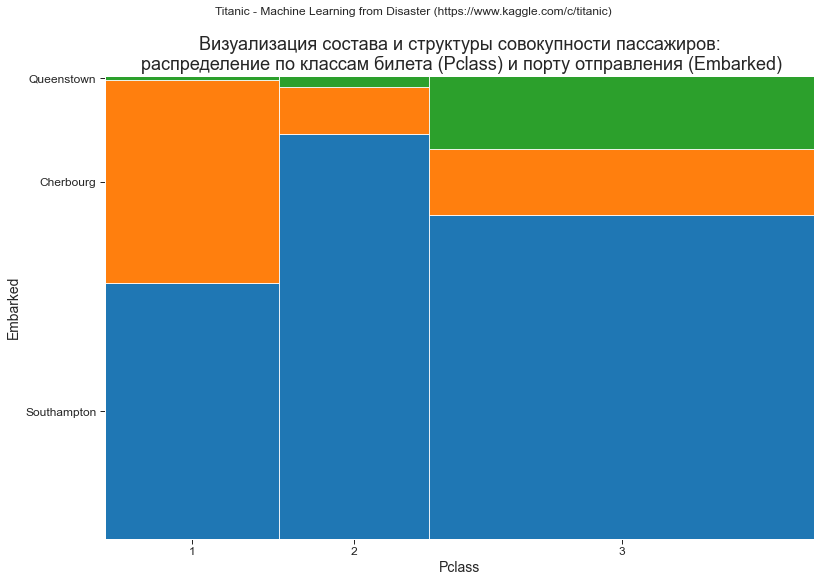

In [36]:
# формируем список цветов (из цветовой карты tab10, https://matplotlib.org/stable/tutorials/colors/colormaps.html)
#legend_list = list(data_df.columns)
legend_list = ['Southampton', 'Cherbourg', 'Queenstown']
colors_number = len(legend_list)
color_list = []
for i in range(colors_number):
    color_list.append(mpl.colors.to_hex(plt.cm.tab10.colors[i]))
print(f'color_list = {color_list}')

# задаем привязку цветов к категориям в виде словаря (dict)
color_dict = {}
for i in range(colors_number):
    color_dict[legend_list[i]] = color_list[i]
print(f'props_dict_cols = {color_dict}')

# формируем словарь props_dict для реализации функции graph_contingency_tables_mosaicplot_sm
props_dict = make_color_mosaicplot_dict(
    rows_list=legend_list,
    cols_list=list(data_df.index),
    props_dict_rows=color_dict)
print(f'\nprops_dict = {props_dict}')  

# построение графика
graph_contingency_tables_mosaicplot_sm(
    data_df_in=data_df,
    properties=props_dict,
    labelizer=False,
    title_figure = Task_Project, title_figure_fontsize = 12,
    title_axes = title_axes,
    x_label = 'Pclass', y_label = 'Embarked',
    y_ticklabels_list = ['Southampton', 'Cherbourg', 'Queenstown'],
    #tick_fontsize = 11, tick_label_rotation = 45,
    text_fontsize = 14,
    gap = 0,
    #legend_list = legend_list,
    statistic = False,
    #graph_size = (297/INCH, 210/INCH)
    )

#### <font size="4"> ***Визуализация с помощью столбчатой диаграммы и графика взаимодействия частот***

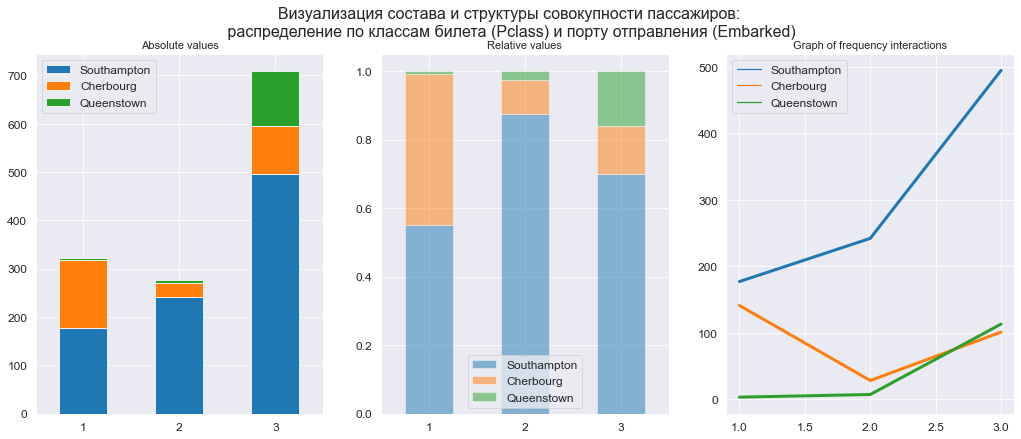


Absolute values:


,Southampton,Cherbourg,Queenstown,sum
Pclass,,,,
1,177,141,3,321
2,242,28,7,277
3,495,101,113,709



Relative values:


,Southampton,Cherbourg,Queenstown,sum
Pclass,,,,
1,0.551402,0.439252,0.009346,1.000000
2,0.873646,0.101083,0.025271,1.000000
3,0.698166,0.142454,0.159379,1.000000


In [37]:
graph_contingency_tables_bar_freqint(
    data_df_in=data_df,
    graph_inclusion='arf',
    title_figure = title_axes, title_figure_fontsize = 16,
    y_ticklabels_list = ['Southampton', 'Cherbourg', 'Queenstown'],
    result_output=True,
    tight_layout=False,
    graph_size=(297/INCH*1.5, 210/INCH/1.25)
    )

#### <font size="4"> ***Визуализация с помощью графика "тепловой карты" (heatmap)***

Формируем графики абсолютных и относительных (доли каждой категории в общем объеме совокупности) частот:

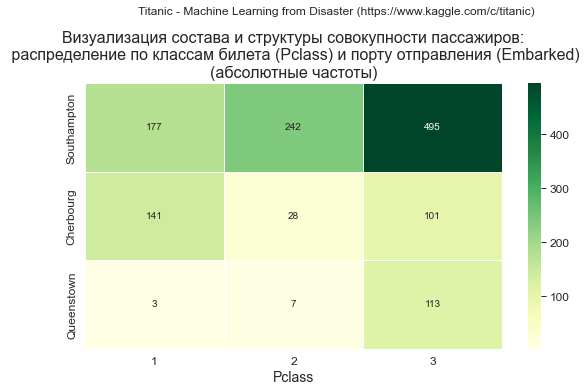

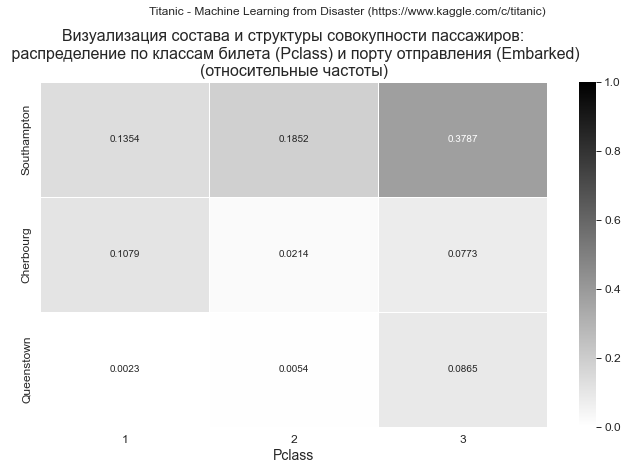

In [38]:
# абсолютные частоты
graph_contingency_tables_heatmap(
    data_df_in=data_df,
    title_figure = Task_Project, #title_figure_fontsize = 14,
    title_axes = title_axes + '\n(абсолютные частоты)', title_axes_fontsize = 16,
    y_ticklabels_list = ['Southampton', 'Cherbourg', 'Queenstown'],
    #values_type = 'absolute',
    color_map='YlGn',
    graph_size=(297/INCH/1.5, 210/INCH/1.5)
    )

# относительные частоты
graph_contingency_tables_heatmap(
    data_df_in=data_df,
    title_figure = Task_Project, #title_figure_fontsize = 14,
    title_axes = title_axes + '\n(относительные частоты)', title_axes_fontsize = 16,
    y_ticklabels_list = ['Southampton', 'Cherbourg', 'Queenstown'],
    values_type = 'relative',
    #color_map='YlGn',
    fmt = '.4f',
    graph_size=(297/INCH/1.25, 210/INCH/1.25)
    )

### <center> <u>***Пример 2: визуализация влияния различных факторов на выживаемость пассажиров***</u>

Теперь проанализируем влияние различных факторов на выживаемость пассажиров.

In [39]:
dataset_df = dataset_train_df.copy()
#display(dataset_df)
display(dataset_df.head(3)), display(dataset_df.tail(3))
dataset_df.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.000000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.750000,NaN,Q


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### <u>***Класс билета (Pclass)***</u>

#### <font size="4"> ***Первичная обработка и группировка данных***

Проверим пропуски по полям **Pclass** и **Survived** с помощью графика "тепловой карты":

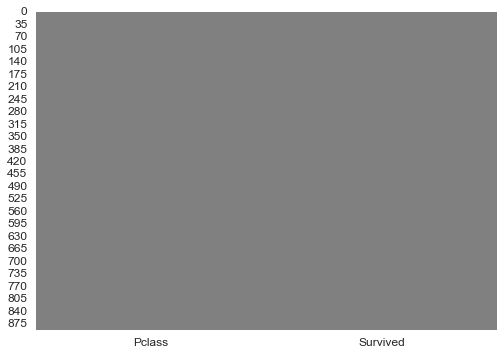

,size,detected values,percentage of detected values
Pclass,891,0,0.000000
Survived,891,0,0.000000


In [40]:
data_df = dataset_df.loc[:, ['Pclass', 'Survived']]
result_df, detection_values_df = df_detection_values(data_df, detection_values=[' ', nan, None])
display(result_df)

<u>**Вывод:**</u> пропуски отсутствуют.

Группировка данных:

In [41]:
dataset_df_Survived_Pclass = dataset_df.pivot_table(
    values='PassengerId',
    index='Pclass',
    columns='Survived',
    aggfunc='count',
    fill_value=0,
    margins=True)
dataset_df_Survived_Pclass['Survival rate'] = dataset_df_Survived_Pclass[1] / dataset_df_Survived_Pclass['All']

#display(dataset_df_Survived_Pclass)
print(dataset_df_Survived_Pclass)

Survived    0    1  All  Survival rate
Pclass                                
1          80  136  216       0.629630
2          97   87  184       0.472826
3         372  119  491       0.242363
All       549  342  891       0.383838


#### <font size="4"> ***Визуализация с помощью трехмерной гистограммы***

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticklabels_list, fontsize = tick_fontsize, rotation=rows_tick_rotation)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticklabels_list, fontsize = tick_fontsize, rotation=cols_tick_rotation)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:120: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


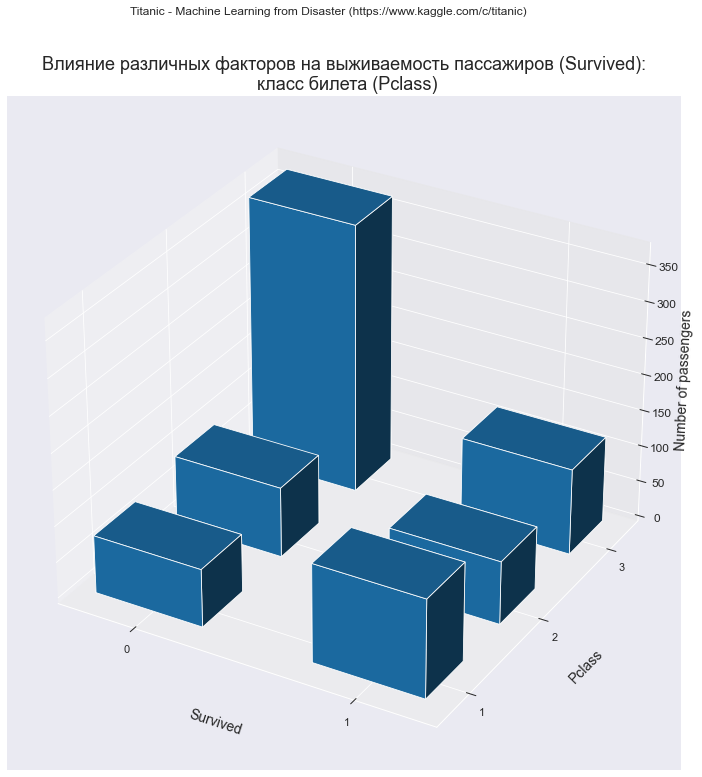

In [42]:
dataset_df_sample = dataset_df_Survived_Pclass.copy()
data_df = dataset_df_sample.iloc[:dataset_df_sample.shape[0]-1, :dataset_df_sample.shape[1]-2]

title_axes = 'Влияние различных факторов на выживаемость пассажиров (Survived):\n класс билета (Pclass)'

graph_contingency_tables_hist_3D(data_df,
                                 title_figure = Task_Project, title_figure_fontsize = 12,
                                 title_axes = title_axes, title_axes_fontsize = 18,
                                 rows_label = 'Pclass',
                                 cols_label = 'Survived',
                                 vertical_label = 'Number of passengers',
                                 graph_size = (297/INCH*1.5, 210/INCH*1.5)
                                 )    

#### <font size="4"> ***Визуализация с помощью мозаичной диаграммы***

data_dict = 
{('1', '0'): 80, ('1', '1'): 136, ('2', '0'): 97, ('2', '1'): 87, ('3', '0'): 372, ('3', '1'): 119}


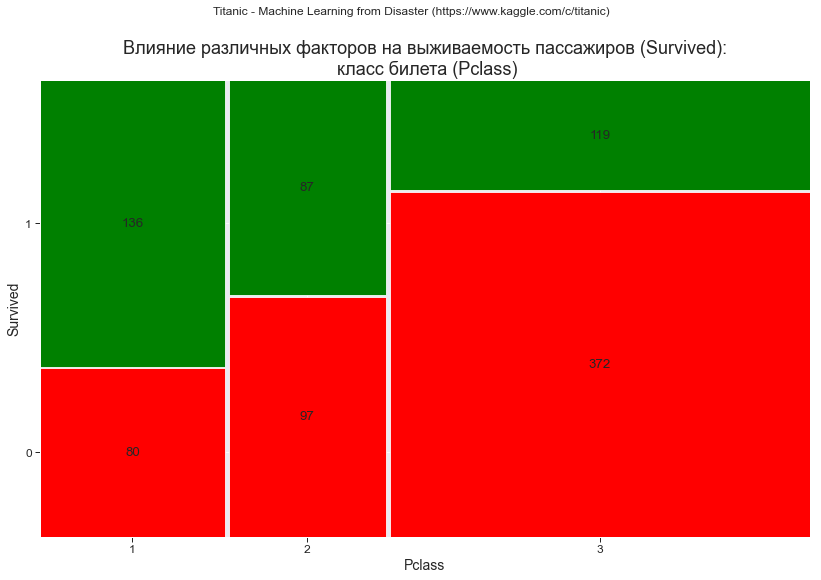

In [43]:
data_df = dataset_df_sample.iloc[:dataset_df_sample.shape[0]-1, :dataset_df_sample.shape[1]-2]
#props_func = lambda key: {'color': 'green' if '1' in key else 'red'}

props_dict_rows = {'1': 'green',
                   '0': 'red'}
props_dict = make_color_mosaicplot_dict(
    rows_list=data_df.columns,
    cols_list=data_df.index,
    props_dict_rows=props_dict_rows)

graph_contingency_tables_mosaicplot_sm(
    data_df_in=data_df,
    properties=props_dict,
    title_figure = Task_Project,
    title_axes = title_axes,
    x_label = 'Pclass',
    y_label = 'Survived',
    #label_fontsize = 14, 
    #statistic = False,
    #graph_size = (297/INCH, 210/INCH)
    )

<u>**Вывод:**</u> зависимость прослеживается, вероятность выжить для пассажиров 3 класса существенно ниже, чем для пассажиров 1 и 2 класса.

#### <font size="4"> ***Визуализация с помощью столбчатой диаграммы и графика взаимодействия частот***

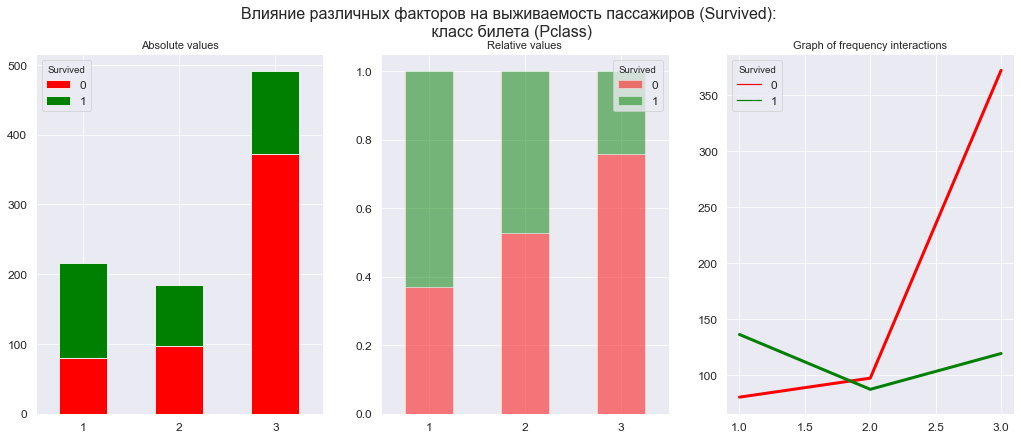


Absolute values:


Survived,0,1,sum
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491



Relative values:


Survived,0,1,sum
Pclass,,,
1,0.370370,0.629630,1.000000
2,0.527174,0.472826,1.000000
3,0.757637,0.242363,1.000000


In [44]:
graph_contingency_tables_bar_freqint(
    data_df_in=data_df,
    graph_inclusion='arf',
    title_figure = title_axes, title_figure_fontsize = 16,
    color = ['red', 'green'],
    result_output=True,
    tight_layout=False,
    graph_size=(297/INCH*1.5, 210/INCH/1.25)
    )

#### <font size="4"> ***Визуализация с помощью графика "тепловой карты" (heatmap)***

Формируем графики абсолютных и относительных (доли каждой категории в общем объеме совокупности) частот:

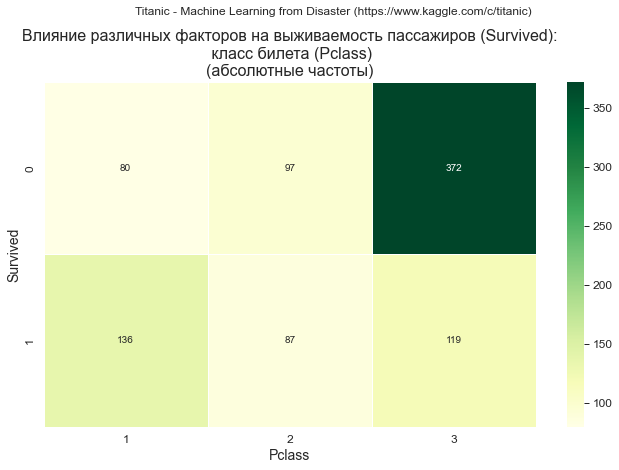

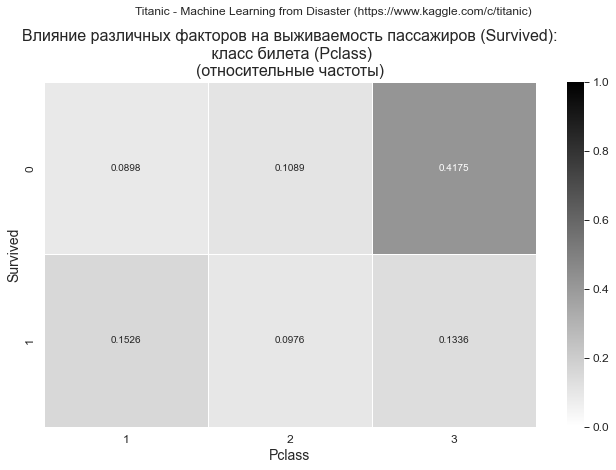

In [45]:
# абсолютные частоты
graph_contingency_tables_heatmap(
    data_df_in=data_df,
    title_figure = Task_Project, #title_figure_fontsize = 14,
    title_axes = title_axes + '\n(абсолютные частоты)', title_axes_fontsize = 16,
    #values_type = 'absolute',
    color_map='YlGn',
    graph_size=(297/INCH/1.25, 210/INCH/1.25)
    )

# относительные частоты
graph_contingency_tables_heatmap(
    data_df_in=data_df,
    title_figure = Task_Project, #title_figure_fontsize = 14,
    title_axes = title_axes + '\n(относительные частоты)', title_axes_fontsize = 16,
    values_type = 'relative',
    #color_map='YlGn',
    fmt = '.4f',
    graph_size=(297/INCH/1.25, 210/INCH/1.25)
    )

#### <u>***Пол (Sex)***</u>

#### <font size="4"> ***Первичная обработка и группировка данных***

Проверим пропуски по полям **Sex** и **Survived** с помощью графика "тепловой карты":

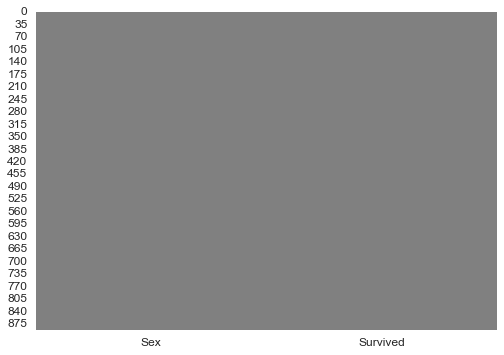

,size,detected values,percentage of detected values
Sex,891,0,0.000000
Survived,891,0,0.000000


In [46]:
data_df = dataset_df.loc[:, ['Sex', 'Survived']]
result_df, detection_values_df = df_detection_values(data_df, detection_values=[' ', nan, None])
display(result_df)

<u>**Вывод:**</u> пропуски отсутствуют.

Группировка данных:

In [47]:
dataset_df_Survived_Sex = dataset_df.pivot_table(
    values='PassengerId',
    index='Sex',
    columns='Survived',
    aggfunc='count',
    fill_value=0,
    margins=True)
dataset_df_Survived_Sex['Survival rate'] = dataset_df_Survived_Sex[1] / dataset_df_Survived_Sex['All']

#display(dataset_df_Survived_Sex)
print(dataset_df_Survived_Sex)

Survived    0    1  All  Survival rate
Sex                                   
female     81  233  314       0.742038
male      468  109  577       0.188908
All       549  342  891       0.383838


#### <font size="4"> ***Визуализация с помощью трехмерной гистограммы***

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticklabels_list, fontsize = tick_fontsize, rotation=rows_tick_rotation)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticklabels_list, fontsize = tick_fontsize, rotation=cols_tick_rotation)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:120: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


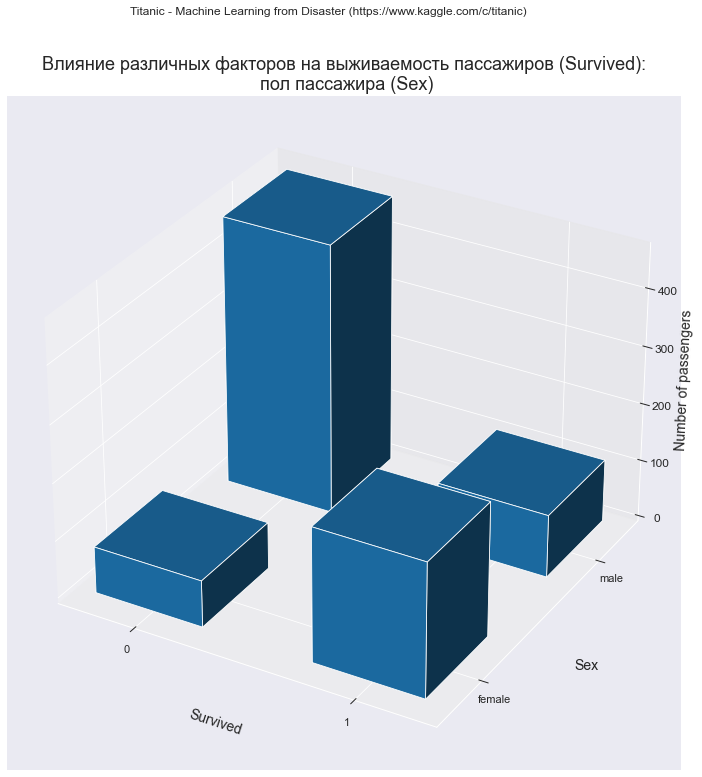

In [48]:
dataset_df_sample = dataset_df_Survived_Sex.copy()
data_df = dataset_df_sample.iloc[:dataset_df_sample.shape[0]-1, :dataset_df_sample.shape[1]-2]

title_axes = 'Влияние различных факторов на выживаемость пассажиров (Survived):\n пол пассажира (Sex)'

graph_contingency_tables_hist_3D(data_df,
                                 title_figure = Task_Project, title_figure_fontsize = 12,
                                 title_axes = title_axes, title_axes_fontsize = 18,
                                 rows_label = 'Sex',
                                 cols_label = 'Survived',
                                 vertical_label = 'Number of passengers',
                                 graph_size = (297/INCH*1.5, 210/INCH*1.5))    

#### <font size="4"> ***Визуализация с помощью мозаичной диаграммы***

data_dict = 
{('female', '0'): 81, ('female', '1'): 233, ('male', '0'): 468, ('male', '1'): 109}


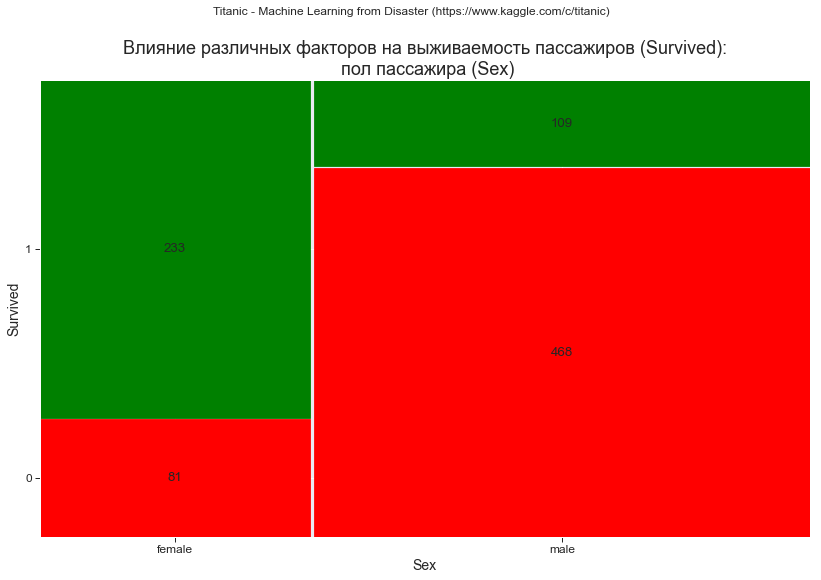

In [49]:
data_df = dataset_df_sample.iloc[:dataset_df_sample.shape[0]-1, :dataset_df_sample.shape[1]-2]
props_func = lambda key: {'color': 'green' if '1' in key else 'red'}

graph_contingency_tables_mosaicplot_sm(
    data_df_in=data_df,
    properties=props_func,
    title_figure = Task_Project, title_figure_fontsize = 12,
    title_axes = title_axes,
    x_label = 'Sex',
    y_label = 'Survived',
    #label_fontsize = 14, 
    #statistic = False,
    #graph_size = (297/INCH, 210/INCH)
    )

<u>**Вывод:**</u> зависимость прослеживается, вероятность выжить для мужчин существенно ниже, чем для женщин.

#### <font size="4"> ***Визуализация с помощью столбчатой диаграммы и графика взаимодействия частот***

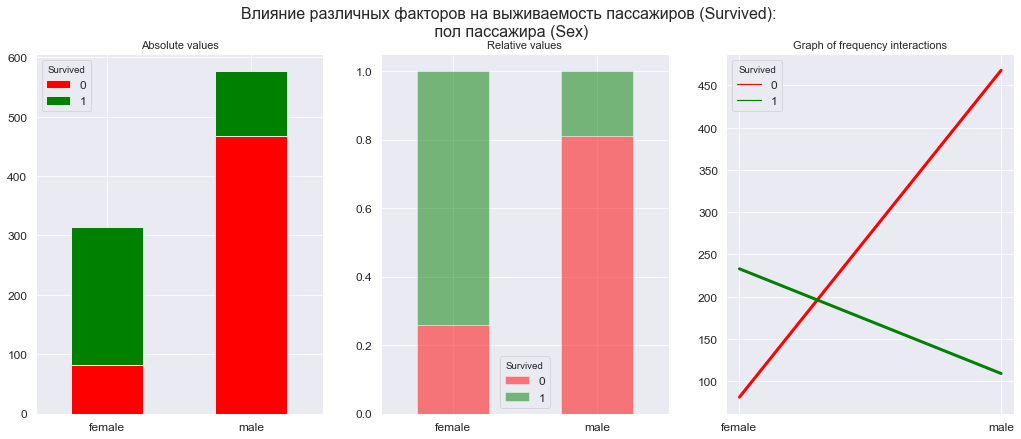


Absolute values:


Survived,0,1,sum
Sex,,,
female,81,233,314
male,468,109,577



Relative values:


Survived,0,1,sum
Sex,,,
female,0.257962,0.742038,1.000000
male,0.811092,0.188908,1.000000


In [50]:
graph_contingency_tables_bar_freqint(
    data_df_in=data_df,
    graph_inclusion='arf',
    title_figure = title_axes, title_figure_fontsize = 16,
    color = ['red', 'green'],
    result_output=True,
    tight_layout=False,
    graph_size=(297/INCH*1.5, 210/INCH/1.25)
    )

#### <font size="4"> ***Визуализация с помощью графика "тепловой карты" (heatmap)***

Формируем графики абсолютных и относительных (доли каждой категории в общем объеме совокупности) частот:

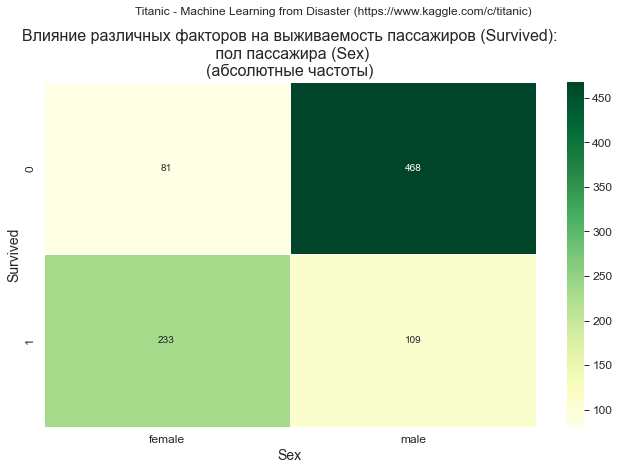

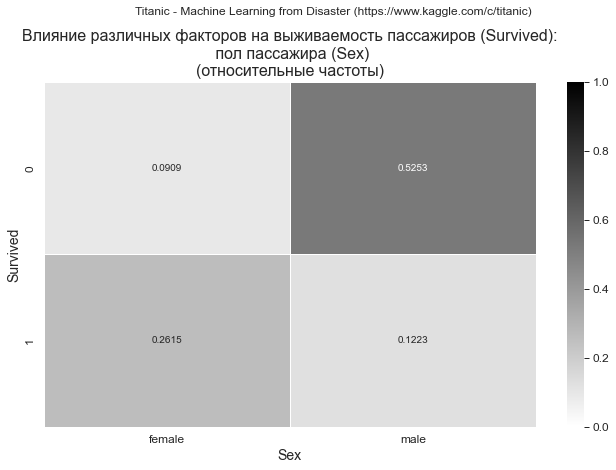

In [51]:
# абсолютные частоты
graph_contingency_tables_heatmap(
    data_df_in=data_df,
    title_figure = Task_Project, #title_figure_fontsize = 14,
    title_axes = title_axes + '\n(абсолютные частоты)', title_axes_fontsize = 16,
    #values_type = 'absolute',
    color_map='YlGn',
    graph_size=(297/INCH/1.25, 210/INCH/1.25)
    )

# относительные частоты
graph_contingency_tables_heatmap(
    data_df_in=data_df,
    title_figure = Task_Project, #title_figure_fontsize = 14,
    title_axes = title_axes + '\n(относительные частоты)', title_axes_fontsize = 16,
    values_type = 'relative',
    #color_map='YlGn',
    fmt = '.4f',
    graph_size=(297/INCH/1.25, 210/INCH/1.25)
    )

#### <u>***Возраст (Age)***</u>

#### <font size="4"> ***Первичная обработка и группировка данных***

По аналогии с предыдущим примером добавим в датасет качественную категорию - период возраста **Age period**:

In [52]:
# добавляем в датасет поле Age period
dataset_df['Age period'] = dataset_df['Age'].apply(age_transform_func)
display(dataset_df)

# сохраняем откорректированный датасет в формате Excel (может пригодиться)
#dataset_df.to_excel('dataset_train_df.xlsx')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age period
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S,maturity
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C,maturity
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S,maturity
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S,maturity
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,NaN,S,maturity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.000000,NaN,S,maturity
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.000000,B42,S,adolescence
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450000,NaN,S,None
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.000000,C148,C,maturity


Проверим пропуски по полям **Age** и **Survived** с помощью графика "тепловой карты":

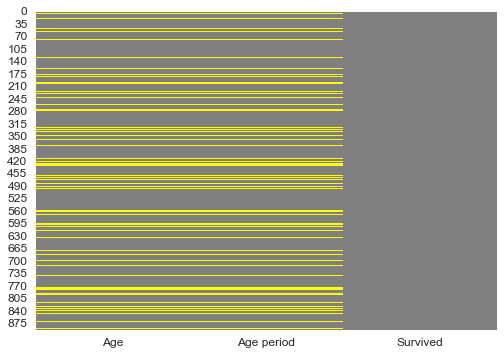

,size,detected values,percentage of detected values
Age,891,177,0.198653
Age period,891,177,0.198653
Survived,891,0,0.000000


In [53]:
data_df = dataset_df.loc[:, ['Age', 'Age period', 'Survived']]
result_df, detection_values_df = df_detection_values(data_df, detection_values=[' ', nan, None])
display(result_df)

Видим, что среди значений поля **Age** имеются пропуски, которые нужно исключить, чтобы они не исказили результаты анализа:

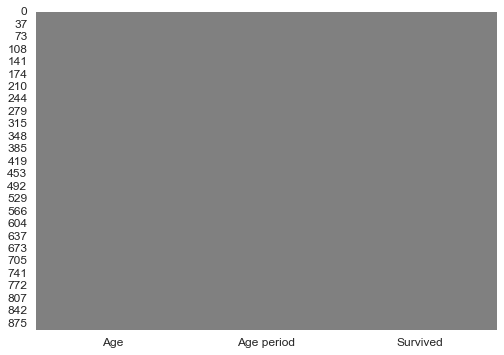

,size,detected values,percentage of detected values
Age,714,0,0.000000
Age period,714,0,0.000000
Survived,714,0,0.000000


In [54]:
# формируем список строк, подлежащих удалению
drop_labels = []
for elem in detection_values_df.index:
    if detection_values_df.loc[elem].any():
        drop_labels.append(elem)
#display(drop_labels)

# удаляем строки
dataset_df_age = dataset_df.drop(index=drop_labels)

# проверяем результат удаления
data_df = dataset_df_age.loc[:, ['Age', 'Age period', 'Survived']]
result_df, detection_values_df = df_detection_values(data_df, detection_values=[' ', nan, None])
display(result_df)

<u>**Вывод:**</u> пропуски отсутствуют.

Группировка данных:

In [55]:
dataset_df_Survived_AgePeriod = dataset_df_age.pivot_table(
    values='PassengerId',
    index='Age period',
    columns='Survived',
    aggfunc='count',
    fill_value=0,
    margins=True)
dataset_df_Survived_AgePeriod['Survival rate'] = dataset_df_Survived_AgePeriod[1] / dataset_df_Survived_AgePeriod['All']

#display(dataset_df_Survived_AgePeriod)
print(dataset_df_Survived_AgePeriod)

Survived           0    1  All  Survival rate
Age period                                   
adolescence       88   45  133       0.338346
advanced age      28   11   39       0.282051
childhood         13    8   21       0.380952
early age         10   20   30       0.666667
early childhood    6   14   20       0.700000
maturity         279  191  470       0.406383
old age            0    1    1       1.000000
All              424  290  714       0.406162


Изменим порядок строк в DataFrame в соответствии с порядком увеличения возраста:

In [56]:
dataset_df_Survived_AgePeriod = dataset_df_Survived_AgePeriod.loc[['early age', 'early childhood', 'childhood', 'adolescence', 'maturity', 'advanced age', 'old age']]
#display(dataset_df_Survived_AgePeriod)
print(dataset_df_Survived_AgePeriod)

Survived           0    1  All  Survival rate
Age period                                   
early age         10   20   30       0.666667
early childhood    6   14   20       0.700000
childhood         13    8   21       0.380952
adolescence       88   45  133       0.338346
maturity         279  191  470       0.406383
advanced age      28   11   39       0.282051
old age            0    1    1       1.000000


#### <font size="4"> ***Визуализация с помощью трехмерной гистограммы***

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticklabels_list, fontsize = tick_fontsize, rotation=rows_tick_rotation)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticklabels_list, fontsize = tick_fontsize, rotation=cols_tick_rotation)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:120: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


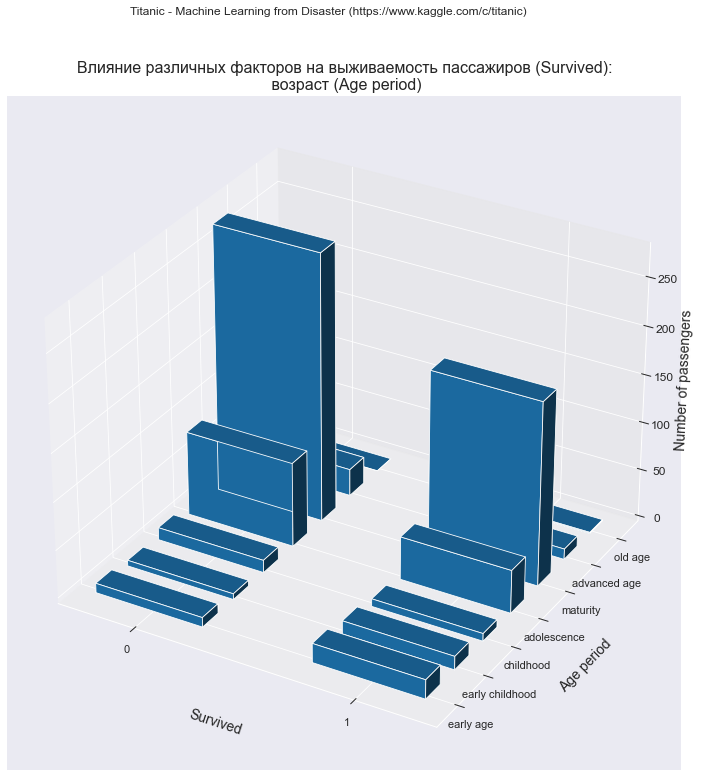

In [57]:
dataset_df_sample = dataset_df_Survived_AgePeriod.copy()
data_df = dataset_df_sample.iloc[:dataset_df_sample.shape[0], :dataset_df_sample.shape[1]-2]

title_axes = 'Влияние различных факторов на выживаемость пассажиров (Survived):\n возраст (Age period)'

graph_contingency_tables_hist_3D(data_df,
                                 title_figure = Task_Project, title_figure_fontsize = 12,
                                 title_axes = title_axes, title_axes_fontsize = 16,
                                 rows_label = 'Age period',
                                 cols_label = 'Survived',
                                 vertical_label = 'Number of passengers',
                                 graph_size = (297/INCH*1.5, 210/INCH*1.5)
                                 )   

#### <font size="4"> ***Визуализация с помощью мозаичной диаграммы***

Для задания цвета мозаичной диаграммы в случае таблиц сопряженности размерности **Nх2** целесообразно использовать не словарь (dict), а менее громоздкий способ с помощью функции:

data_dict = 
{('early age', '0'): 10, ('early age', '1'): 20, ('early childhood', '0'): 6, ('early childhood', '1'): 14, ('childhood', '0'): 13, ('childhood', '1'): 8, ('adolescence', '0'): 88, ('adolescence', '1'): 45, ('maturity', '0'): 279, ('maturity', '1'): 191, ('advanced age', '0'): 28, ('advanced age', '1'): 11, ('old age', '0'): 0, ('old age', '1'): 1}


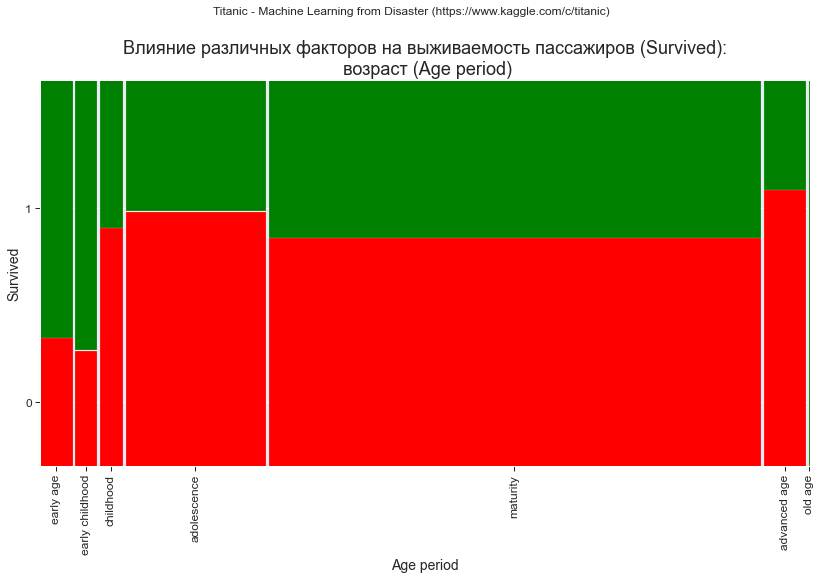

In [58]:
data_df = dataset_df_sample.iloc[:dataset_df_sample.shape[0], :dataset_df_sample.shape[1]-2]
props_func = lambda key: {'color': 'green' if '1' in key else 'red'}

graph_contingency_tables_mosaicplot_sm(
    data_df_in=data_df,
    properties=props_func,
    labelizer = False,
    title_figure = Task_Project, title_figure_fontsize = 12,
    title_axes = title_axes,
    x_label = 'Age period',
    y_label = 'Survived',
    #label_fontsize = 14, 
    tick_label_rotation = [90, 0],
    #statistic = False,
    #graph_size = (297/INCH, 210/INCH)
    )

#### <font size="4"> ***Визуализация с помощью столбчатой диаграммы и графика взаимодействия частот***

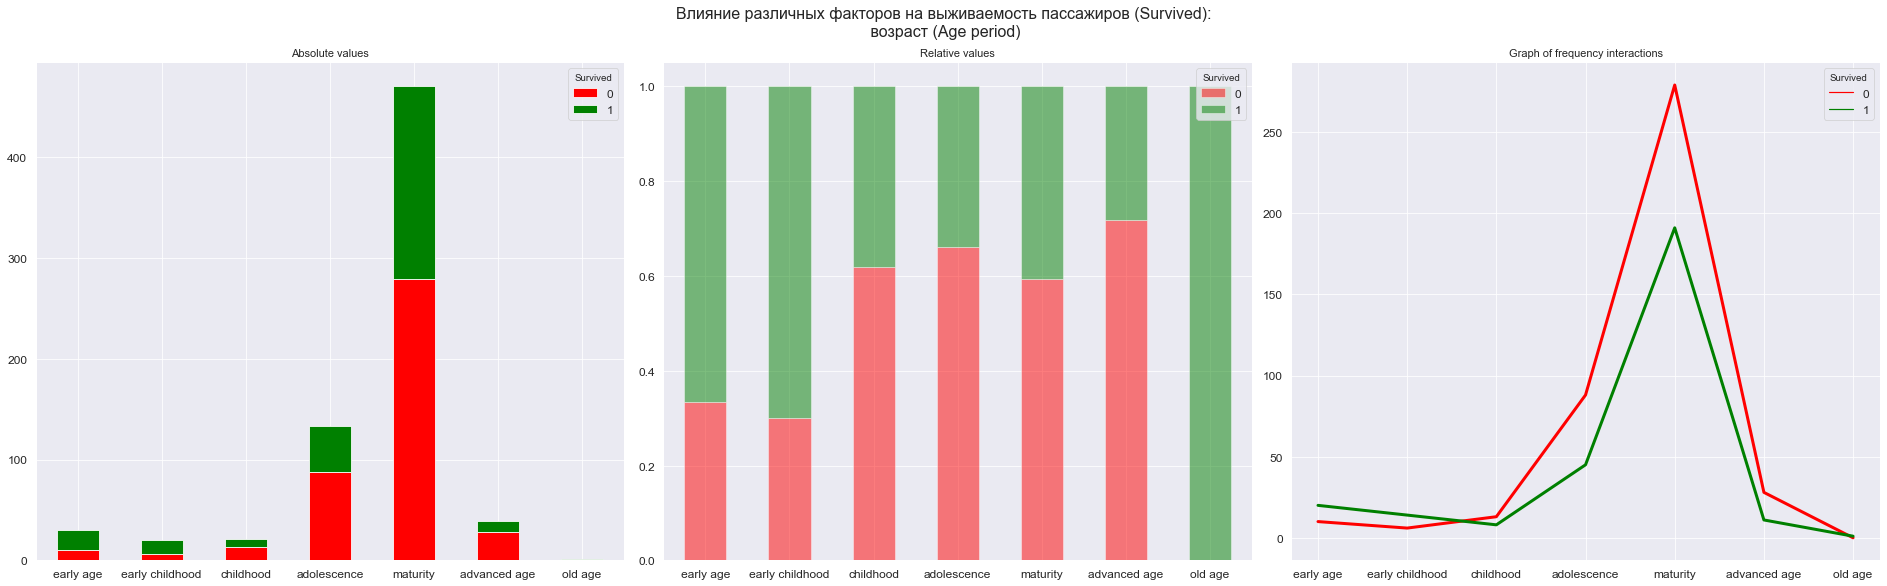


Absolute values:


Survived,0,1,sum
Age period,,,
early age,10,20,30
early childhood,6,14,20
childhood,13,8,21
adolescence,88,45,133
maturity,279,191,470
advanced age,28,11,39
old age,0,1,1



Relative values:


Survived,0,1,sum
Age period,,,
early age,0.333333,0.666667,1.000000
early childhood,0.300000,0.700000,1.000000
childhood,0.619048,0.380952,1.000000
adolescence,0.661654,0.338346,1.000000
maturity,0.593617,0.406383,1.000000
advanced age,0.717949,0.282051,1.000000
old age,0.000000,1.000000,1.000000


In [59]:
graph_contingency_tables_bar_freqint(
    data_df_in=data_df,
    graph_inclusion='arf',
    title_figure = title_axes, title_figure_fontsize = 16,
    color = ['red', 'green'],
    result_output=True,
    #tight_layout=False,
    #graph_size=(297/INCH*1.5, 210/INCH/1.1)
    )

<u>**Вывод:**</u> зависимость прослеживается, вероятность выжить отличается для разных возрастных категорий.

Обратите внимание, что для формирования компактного расположения столбцов на графике с относительно длинными подписями отключаем настройку **tight_layout=False**; либо, если надписи кажутся слишком мелкими. можно вывести графики по отдельности:

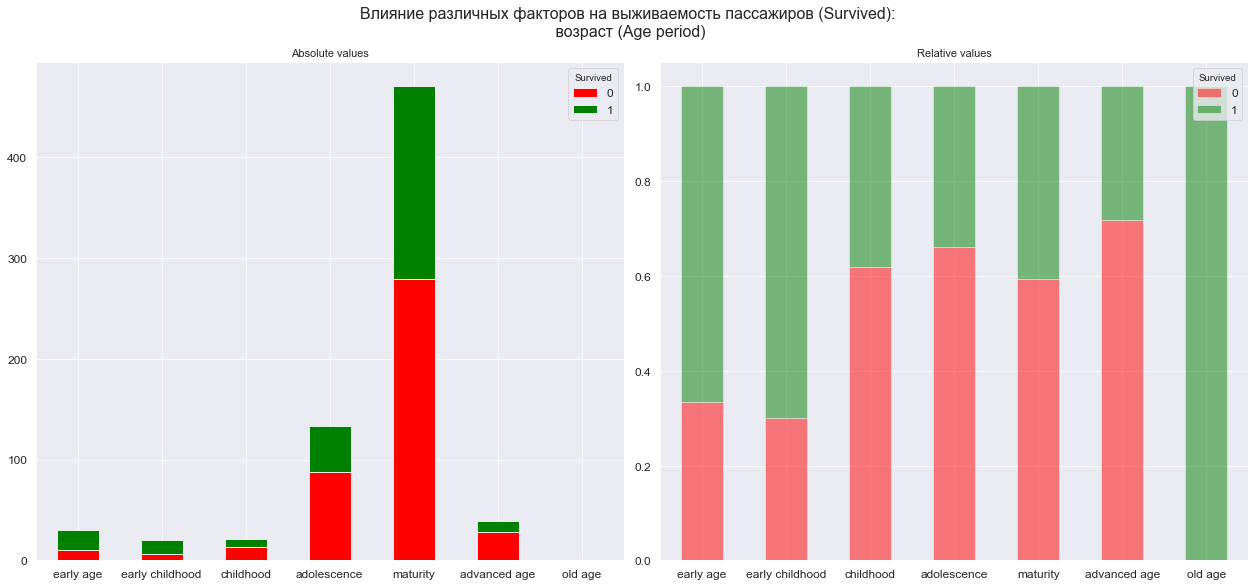

In [60]:
graph_contingency_tables_bar_freqint(
    data_df_in=data_df,
    graph_inclusion='ar',
    title_figure = title_axes, title_figure_fontsize = 16,
    color = ['red', 'green'],
    #result_output=True,
    #tight_layout=False,
    #graph_size=(297/INCH*1.5, 210/INCH/1.1)
    )

#### <font size="4"> ***Визуализация с помощью графика "тепловой карты" (heatmap)***

Формируем графики абсолютных и относительных (доли каждой категории в общем объеме совокупности) частот:

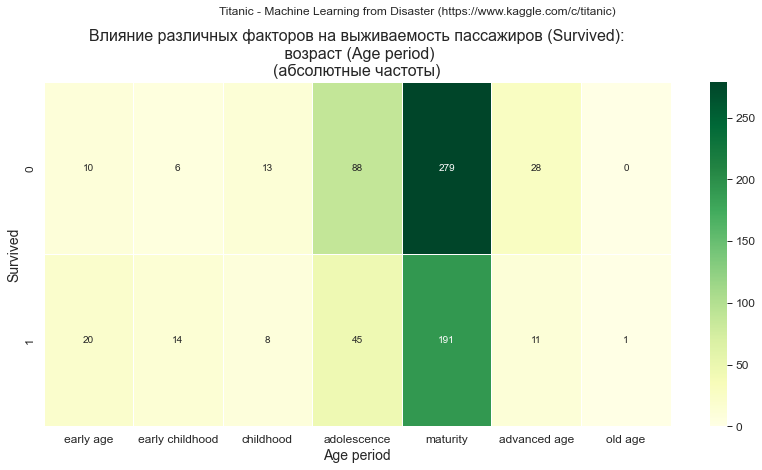

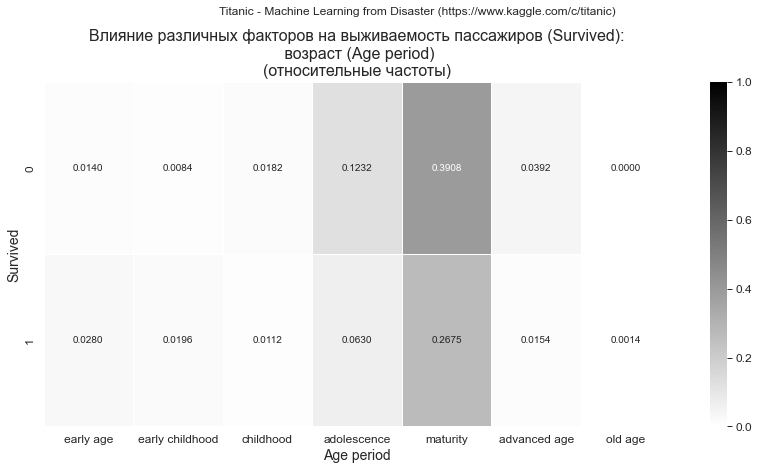

In [61]:
# абсолютные частоты
graph_contingency_tables_heatmap(
    data_df_in=data_df,
    title_figure = Task_Project, #title_figure_fontsize = 14,
    title_axes = title_axes + '\n(абсолютные частоты)', title_axes_fontsize = 16,
    #values_type = 'absolute',
    color_map='YlGn',
    graph_size=(297/INCH, 210/INCH/1.25)
    )

# относительные частоты
graph_contingency_tables_heatmap(
    data_df_in=data_df,
    title_figure = Task_Project, #title_figure_fontsize = 14,
    title_axes = title_axes + '\n(относительные частоты)', title_axes_fontsize = 16,
    values_type = 'relative',
    #color_map='YlGn',
    fmt = '.4f',
    graph_size=(297/INCH, 210/INCH/1.25)
    )

#### <u>***Порт отправления (Embarked)***</u>

#### <font size="4"> ***Первичная обработка и группировка данных***

Проверим пропуски по полям **Embarked** и **Survived** с помощью графика "тепловой карты":

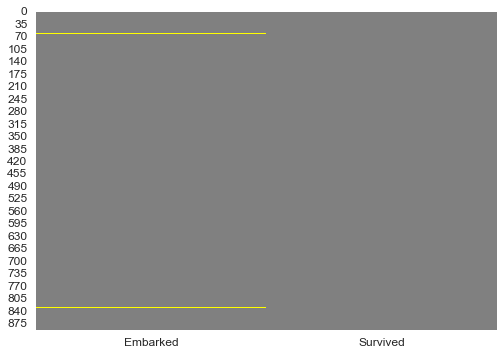

,size,detected values,percentage of detected values
Embarked,891,2,0.002245
Survived,891,0,0.000000


In [62]:
data_df = dataset_df.loc[:, ['Embarked', 'Survived']]
result_df, detection_values_df = df_detection_values(data_df, detection_values=[' ', nan, None])
display(result_df)

Видим, что среди значений поля **Embarked** имеются пропуски, которые нужно исключить, чтобы они не исказили результаты анализа:

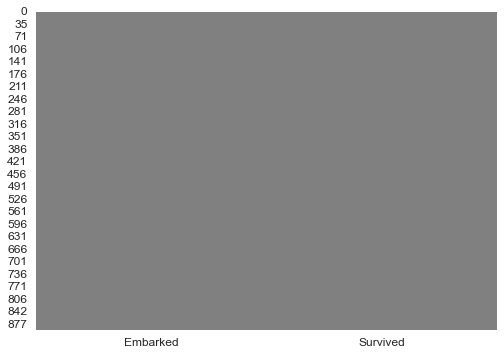

,size,detected values,percentage of detected values
Embarked,889,0,0.000000
Survived,889,0,0.000000


In [63]:
# формируем список строк, подлежащих удалению
drop_labels = []
for elem in detection_values_df.index:
    if detection_values_df.loc[elem].any():
        drop_labels.append(elem)
#display(drop_labels)

# удаляем строки
dataset_df_embarked = dataset_df.drop(index=drop_labels)

# проверяем результат удаления
data_df = dataset_df_embarked.loc[:, ['Embarked', 'Survived']]
result_df, detection_values_df = df_detection_values(data_df, detection_values=[' ', nan, None])
display(result_df)

<u>**Вывод:**</u> пропуски отсутствуют.

Группировка данных:

In [64]:
dataset_df_Survived_Embarked = dataset_df_embarked.pivot_table(
    values='PassengerId',
    index='Embarked',
    columns='Survived',
    aggfunc='count',
    fill_value=0,
    margins=True)
dataset_df_Survived_Embarked['Survival rate'] = dataset_df_Survived_Embarked[1] / dataset_df_Survived_Embarked['All']

#display(dataset_df_Survived_Embarked)
print(dataset_df_Survived_Embarked)

Survived    0    1  All  Survival rate
Embarked                              
C          75   93  168       0.553571
Q          47   30   77       0.389610
S         427  217  644       0.336957
All       549  340  889       0.382452


Изменим порядок строк в DataFrame в соответствии с порядком посадки пассажиров в портах (Southampton, Cherbourg, Queenstown):

In [65]:
dataset_df_Survived_Embarked = dataset_df_Survived_Embarked.loc[['S', 'C', 'Q']]
#display(dataset_df_Survived_Embarked)
print(dataset_df_Survived_Embarked)

Survived    0    1  All  Survival rate
Embarked                              
S         427  217  644       0.336957
C          75   93  168       0.553571
Q          47   30   77       0.389610


#### <font size="4"> ***Визуализация с помощью трехмерной гистограммы***

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticklabels_list, fontsize = tick_fontsize, rotation=rows_tick_rotation)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticklabels_list, fontsize = tick_fontsize, rotation=cols_tick_rotation)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17072\776007734.py:120: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


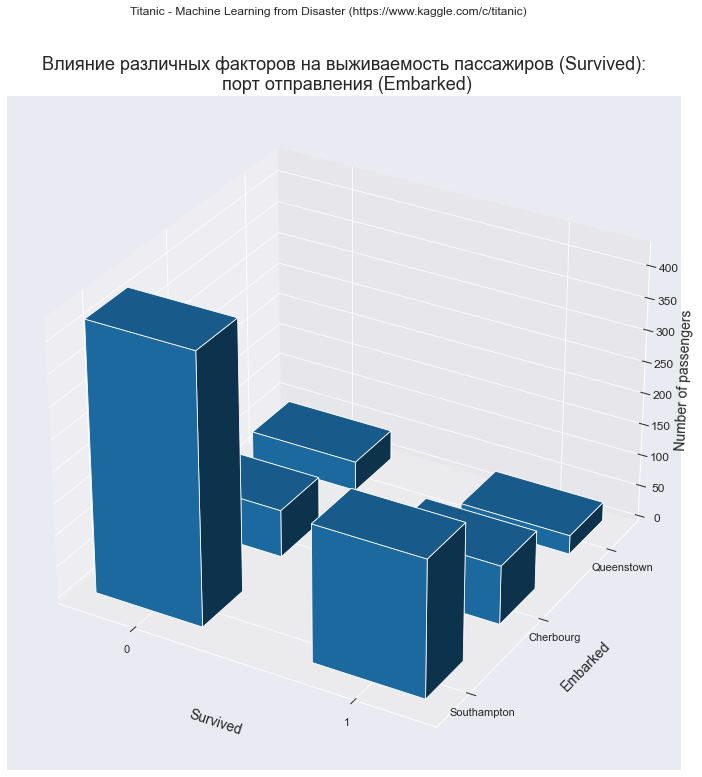

In [66]:
dataset_df_sample = dataset_df_Survived_Embarked.copy()
data_df = dataset_df_sample.iloc[:dataset_df_sample.shape[0]-0, :dataset_df_sample.shape[1]-2]

title_axes = 'Влияние различных факторов на выживаемость пассажиров (Survived):\n порт отправления (Embarked)'

graph_contingency_tables_hist_3D(data_df,
                                 title_figure = Task_Project, title_figure_fontsize = 12,
                                 title_axes = title_axes, title_axes_fontsize = 18,
                                 rows_label = 'Embarked',
                                 cols_label = 'Survived',
                                 rows_ticklabels_list = ['Southampton', 'Cherbourg', 'Queenstown'],
                                 vertical_label = 'Number of passengers',
                                 graph_size = (297/INCH*1.5, 210/INCH*1.5))    

#### <font size="4"> ***Визуализация с помощью мозаичной диаграммы***

data_dict = 
{('Southampton', '0'): 427, ('Southampton', '1'): 217, ('Cherbourg', '0'): 75, ('Cherbourg', '1'): 93, ('Queenstown', '0'): 47, ('Queenstown', '1'): 30}


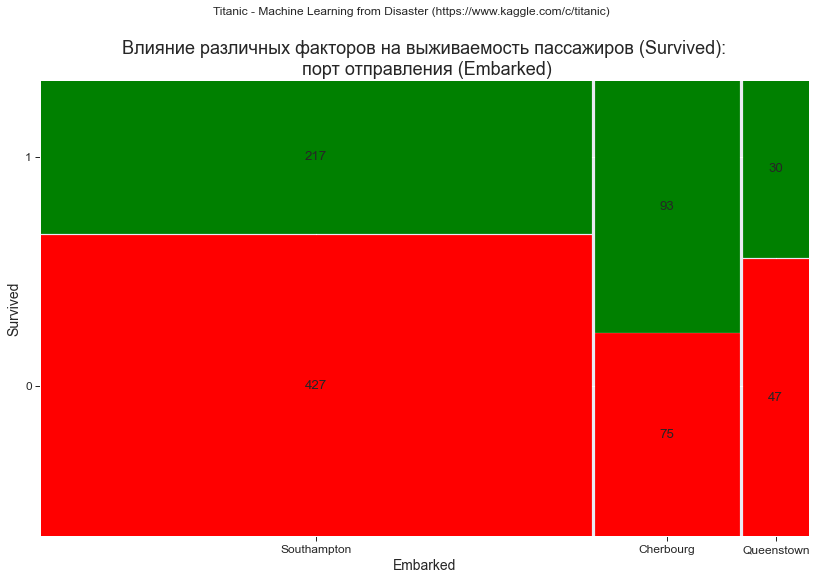

In [67]:
data_df = dataset_df_sample.iloc[:dataset_df_sample.shape[0]-0, :dataset_df_sample.shape[1]-2]
props_func = lambda key: {'color': 'green' if '1' in key else 'red'}

graph_contingency_tables_mosaicplot_sm(
    data_df_in=data_df,
    properties=props_func,
    title_figure = Task_Project, title_figure_fontsize = 12,
    title_axes = title_axes,
    x_label = 'Embarked',
    y_label = 'Survived',
    x_ticklabels_list = ['Southampton', 'Cherbourg', 'Queenstown'],
    #label_fontsize = 14, 
    #statistic = False,
    #graph_size = (297/INCH, 210/INCH)
    )

#### <font size="4"> ***Визуализация с помощью столбчатой диаграммы и графика взаимодействия частот***

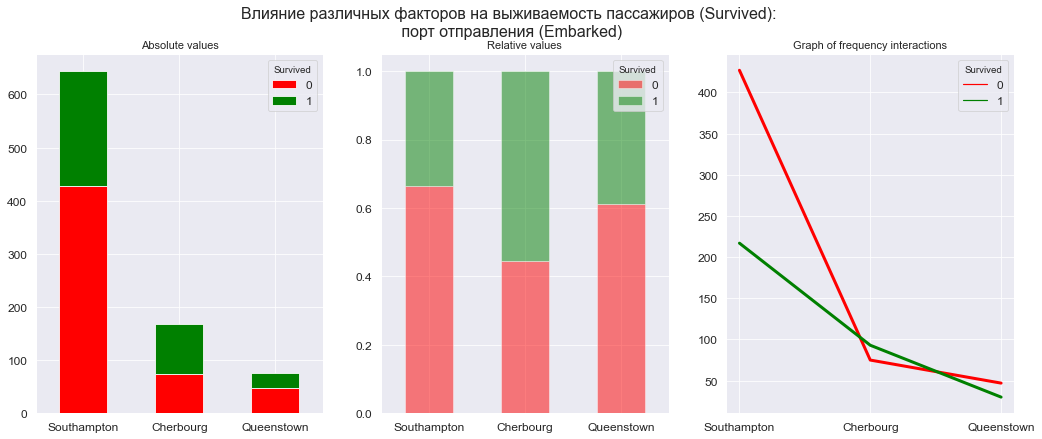


Absolute values:


Survived,0,1,sum
Southampton,427,217,644
Cherbourg,75,93,168
Queenstown,47,30,77



Relative values:


Survived,0,1,sum
Southampton,0.663043,0.336957,1.000000
Cherbourg,0.446429,0.553571,1.000000
Queenstown,0.610390,0.389610,1.000000


In [68]:
graph_contingency_tables_bar_freqint(
    data_df_in=data_df,
    graph_inclusion='arf',
    title_figure = title_axes, title_figure_fontsize = 16,
    color = ['red', 'green'],
    result_output=True,
    tight_layout=False,
    x_ticklabels_list = ['Southampton', 'Cherbourg', 'Queenstown'],
    graph_size=(297/INCH*1.5, 210/INCH/1.25)
    )

<u>**Вывод:**</u> графический анализ позволяет выявить аномалию: вероятность выжить существенно выше для пассажиров, взошедших на борт судна в Шербуре (Cherbourg). Случайно ли это? Проведенный выше анализ установил, что в Шербуре существенно выше доля пассажиров 1 класса, так что объяснение этой аномалии имеется. Разумеется такие выводы нужно подтверждать проверкой соответствующих гипотез (но это выходит за рамки данной статьи).

#### <font size="4"> ***Визуализация с помощью графика "тепловой карты" (heatmap)***

Формируем графики абсолютных и относительных (доли каждой категории в общем объеме совокупности) частот:

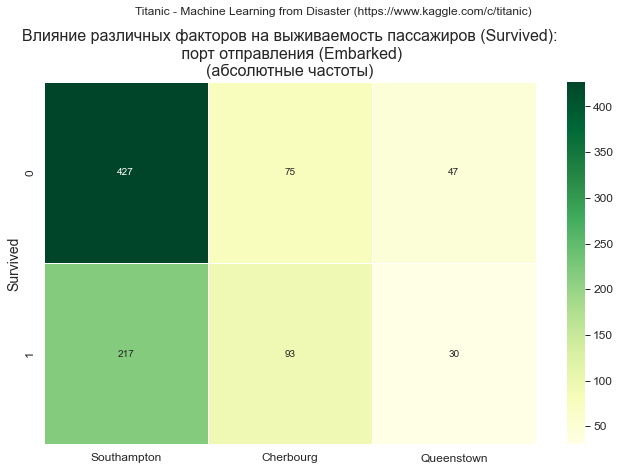

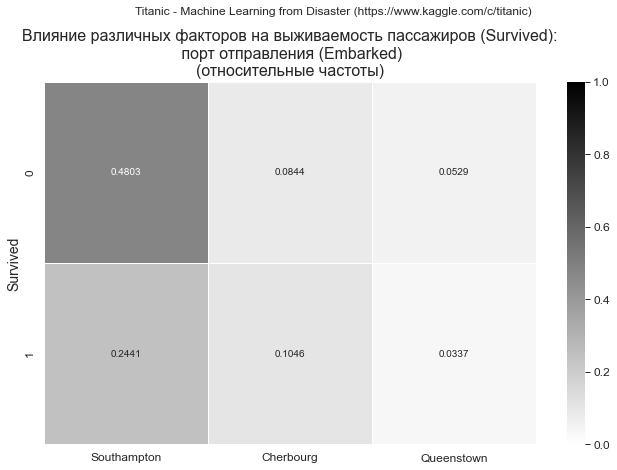

In [69]:
# абсолютные частоты
graph_contingency_tables_heatmap(
    data_df_in=data_df,
    title_figure = Task_Project, #title_figure_fontsize = 14,
    title_axes = title_axes + '\n(абсолютные частоты)', title_axes_fontsize = 16,
    x_ticklabels_list = ['Southampton', 'Cherbourg', 'Queenstown'],
    #values_type = 'absolute',
    color_map='YlGn',
    graph_size=(297/INCH/1.25, 210/INCH/1.25)
    )

# относительные частоты
graph_contingency_tables_heatmap(
    data_df_in=data_df,
    title_figure = Task_Project, #title_figure_fontsize = 14,
    title_axes = title_axes + '\n(относительные частоты)', title_axes_fontsize = 16,
    x_ticklabels_list = ['Southampton', 'Cherbourg', 'Queenstown'],
    values_type = 'relative',
    #color_map='YlGn',
    fmt = '.4f',
    graph_size=(297/INCH/1.25, 210/INCH/1.25)
    )

### <center> <u>***Небольшой offtop: визуализация многофакторных категориальных связей***</u>

Сложно удержаться от небольшого offtop'а...

Итак, мы рассмотрели визуализацию двухфакторных зависимостей категориальных переменных. Из нашего датасета мы взяли всего 4 факторных признака (**Pclass**, **Sex**, **Age**, **Embarked**) и проанализировали их влияние на один результативный признак (**Survived**) и частично - их влияние друг на друга, при этом отчет получился довольно объемный. Что же будет, если число факторов составит 10, 20 и более? И это все лишь на стадии **разведочного анализа данных (EDA)**.

Очевидно, что необходим инструмент визуализации, который позволит сразу "окинуть взглядом" всю совокупность данных, получить представление о взаимосвязях в ней, выделить наиболее существенные связи и, при необходимости, подвергнуть их более тщательному исследованию. Такой инструмент есть - это **график "тепловой карты" (heatmap)**. Однако, для его реализации необходимо выбрать показатель тесноты взаимосвязи между категориальными переменными. Таких показателей известно немало (наиболее распространенный - критерий хи-квадрат и показатели на его основе), однако в данном обзоре мы не рассматриваем особенности их расчета. Поэтому слегка забегая вперед, рассмотрим пример построения графика "тепловой карты" (heatmap) с использованием **коэффициента сопряженности Крамера (Cramer's V)** (подробнее об этом коэффициенте - см., например, [4, с.746]).

Данный коэффициент характеризует тесноту связи между категориальными переменными и принимает значения в интервале $V \in [0; 1]$. Для его расчета **python** предлагает нам использовать стандартную функцию **scipy.stats.contingency.association** (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html).

Тесноту связи можно оценивать с использованием **шкалы Rea&Parker** - см.[5, с.44]:

|Значение             |Сила взаимосвязи                        |
|:-------------------:|:--------------------------------------:|
|$V<0.1$              |несущественная (unessential)            |
|$0.1 \leq V < 0.2$   |слабая (weak)                           |
|$0.2 \leq V < 0.4$   |средняя (middle)                        |
|$0.4 \leq V < 0.6$   |относительно сильная (relatively strong)|
|$0.6 \leq V < 0.8$   |сильная (strong)                        |
|$0.8 \leq V$         |очень сильная (very strong)             |


#### <font size="4"> ***Первичная обработка данных***

In [70]:
#dataset_df = dataset_train_df.copy()
display(dataset_df)
#display(dataset_df.head(3)), display(dataset_df.tail(3))
dataset_df.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age period
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S,maturity
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C,maturity
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S,maturity
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S,maturity
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,NaN,S,maturity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.000000,NaN,S,maturity
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.000000,B42,S,adolescence
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450000,NaN,S,None
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.000000,C148,C,maturity


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age period   714 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


Проверим пропуски по выбранным полям:

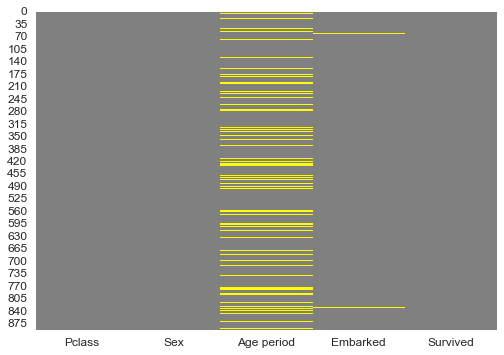

,size,detected values,percentage of detected values
Pclass,891,0,0.000000
Sex,891,0,0.000000
Age period,891,177,0.198653
Embarked,891,2,0.002245
Survived,891,0,0.000000


In [71]:
variable_list = ['Pclass', 'Sex', 'Age period', 'Embarked', 'Survived']
data_df = dataset_df.loc[:, variable_list]
result_df, detection_values_df = df_detection_values(data_df, detection_values=[' ', nan, None])
display(result_df)

Видим, что среди значений выбранных полей имеются пропуски, которые нужно исключить, чтобы они не исказили результаты анализа:

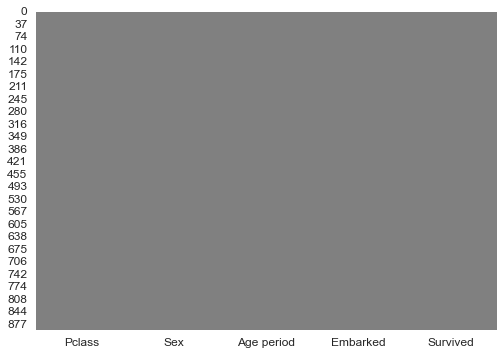

,size,detected values,percentage of detected values
Pclass,712,0,0.000000
Sex,712,0,0.000000
Age period,712,0,0.000000
Embarked,712,0,0.000000
Survived,712,0,0.000000


In [72]:
# формируем список строк, подлежащих удалению
drop_labels = []
for elem in detection_values_df.index:
    if detection_values_df.loc[elem].any():
        drop_labels.append(elem)
#display(drop_labels)

# удаляем строки
dataset_df_drop = dataset_df.drop(index=drop_labels)

# проверяем результат удаления
data_df = dataset_df_drop.loc[:, variable_list]
result_df, detection_values_df = df_detection_values(data_df, detection_values=[' ', nan, None])
display(result_df)

In [73]:
display(dataset_df_drop)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age period
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S,maturity
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C,maturity
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S,maturity
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S,maturity
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,NaN,S,maturity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.125000,NaN,Q,maturity
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.000000,NaN,S,maturity
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.000000,B42,S,adolescence
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.000000,C148,C,maturity


<u>**Вывод:**</u> пропуски отсутствуют.

#### <font size="4"> ***Визуализация с помощью графика "тепловой карты" (heatmap)***

[[1.0000 0.1594 0.2324 0.2558 0.3577]
 [0.1594 1.0000 0.1230 0.1101 0.5338]
 [0.2324 0.1230 1.0000 0.0902 0.1793]
 [0.2558 0.1101 0.0902 1.0000 0.1980]
 [0.3577 0.5338 0.1793 0.1980 1.0000]]


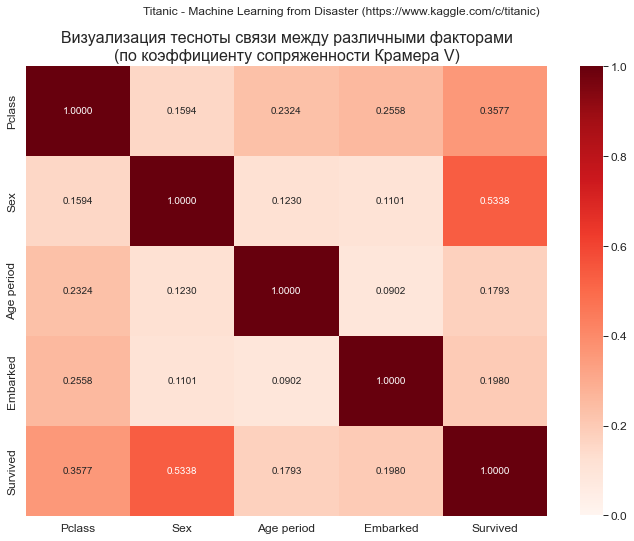

In [74]:
# формируем матрицу коэффициентов сопряженности Крамера
corr_matrix = np.eye(len(variable_list))

for i, elem_i in enumerate(variable_list):
    for j, elem_j in enumerate(variable_list):
        if j>i:
            temp_df = dataset_df_drop.pivot_table(
                values='PassengerId',
                index=elem_i,
                columns=elem_j,
                aggfunc='count',
                fill_value=0)
            corr_matrix[i, j] = sci.stats.contingency.association(temp_df, method='cramer', correction='False')
            corr_matrix[j, i] = corr_matrix[i, j]
print(corr_matrix)           

# построение графика
fig, axes = plt.subplots(figsize=(297/INCH, 210/INCH))
fig.suptitle(Task_Project, fontsize = 12)
title_axes = 'Визуализация тесноты связи между различными факторами\n(по коэффициенту сопряженности Крамера V)'
axes.set_title(title_axes, fontsize = 16)
sns.heatmap(corr_matrix,
            vmin=0, vmax=1,
            cbar=True,
            #center=True,
            annot=True,
            cmap='Reds',
            fmt = '.4f',
            xticklabels=variable_list,
            yticklabels=variable_list)
plt.show()

Конечно, данный график можно и нужно совершенствовать: добавить другие меры связи, добавить на график расчетное значение доверительной вероятности для проверки значимости меры связи, написать пользовательскую функцию и т.д., но это все в дальнейшем, а пока ограничимся тем, что есть.

Сделаем ряд выводов на основании графика "тепловой карты".

На первый взгляд видим, что результативный признак (**Survived**) имеет наиболее тесную связь с двумя из факторных признаков - **Pclass** (V=0.3577) и **Sex** (V=0.5338), что в общем-то вполне логично; теснота связи с оставшимися факторами (**Age period** и **Embarked**) является слабой.

Значит ли это, что мы должны исключить из рассмотрения оставшиеся факторы (**Age period** и **Embarked**)? Конечно, нет. На одной из графиков, представленных выше, мы наблюдаем зависимость доли погибших (т.е. вероятности гибели) от возраста (**Age period**):

* для детей (до 7 лет) вероятность гибели составляет ~0.3;
* для пассажиров возрастом старше 7 до 55 лет вероятность гибели составляет ~0.6;
* для пассажиров преклонного возраста (55-75 лет) вероятность гибели увеличивается до ~0.7.

Очевидно, что зависимость есть, но коэффициент V не в состоянии выявить такие зависимости. Требуется более глубокий анализ, с применением развернутой системы показателей, и проверкой их значимости (но это выходит за пределы данного обзора).

Аналогично, график тепловой карты показывает нам, что связи факторных признаков между собой также являются слабыми, то есть по аналогии с числовыми переменными можно сказать, что мультиколлинеарность не выявлена. Так ли это в действительности? Например, связь между факторами **Embarked** и **Survived** является слабой (V=0.1980). Выше мы установили, что для пассажиров, взошедших на судно в Шербуре (Cherbourg), вероятность выжить выше по сравнению с остальными портами посадки, в то же время в Шербуре существенно выше доля пассажиров 1 класса, у которых гораздо больше шансов спастись. А связь между факторами **Embarked** и **Pclass** также характеризуется всего лишь V=0.2558.

Очевидно, что и зависимости между факторными признаками также присутствуют, но с помощью коэффициента V выявить их не всегда возможно.

Все это еще раз подтверждает то, что **разведочный анализ данных (EDA)** - это сложный творческий процесс, требующий внимательного подхода к данным, тщательного подбора применяемых методов анализа и показателей. На этом этапе вредным будет как излишний формализм, так и принятие решений "на глазок" - нужно найти золотую середину.

Кстати, необходимо обратить внимание - если предварительно не исключить из совокупности пропущенные значения, то получим результат, отличающийся от достигнутого ранее:

[[1.0000 0.1380 0.2353 0.2638 0.3398]
 [0.1380 1.0000 0.1173 0.1226 0.5409]
 [0.2353 0.1173 1.0000 0.0902 0.1761]
 [0.2638 0.1226 0.0902 1.0000 0.1726]
 [0.3398 0.5409 0.1761 0.1726 1.0000]]


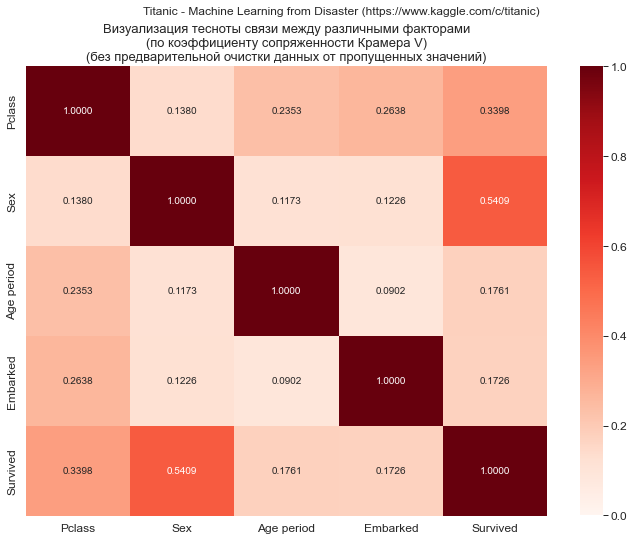

In [75]:
#display(dataset_df)

# формируем матрицу коэффициентов сопряженности Крамера
corr_matrix = np.eye(len(variable_list))

for i, elem_i in enumerate(variable_list):
    for j, elem_j in enumerate(variable_list):
        if j>i:
            temp_df = dataset_df.pivot_table(
                values='PassengerId',
                index=elem_i,
                columns=elem_j,
                aggfunc='count',
                fill_value=0)
            corr_matrix[i, j] = sci.stats.contingency.association(temp_df, method='cramer', correction='False')
            corr_matrix[j, i] = corr_matrix[i, j]
print(corr_matrix)           

# построение графика
fig, axes = plt.subplots(figsize=(297/INCH, 210/INCH))
fig.suptitle(Task_Project, fontsize = 12)
title_axes = 'Визуализация тесноты связи между различными факторами\n(по коэффициенту сопряженности Крамера V)\n(без предварительной очистки данных от пропущенных значений)'
axes.set_title(title_axes, fontsize = 13)
sns.heatmap(corr_matrix,
            vmin=0, vmax=1,
            cbar=True,
            #center=True,
            annot=True,
            cmap='Reds',
            fmt = '.4f',
            xticklabels=variable_list,
            yticklabels=variable_list)
plt.show()

Отличия незначительные, но тем не менее они есть. Это напоминает нам, как **важно не забывать про первичную обработку данных перед анализом**. Будьте бдительны, товарищи!

### <center> <font size="6"> <u>***ИТОГИ***</u>

Итак, подведем итоги:
* мы рассмотрели возможности **python** для визуализации таблиц сопряженности, что является важным элементом **разведочного анализа данных (EDA)** в **DataScience**;
* предложили ряд пользовательских функций для визуализации таблиц сопряженности, что позволит облегчить работу исследователя и уменьшить размер программного кода.

Само собой, мы рассмотрели далеко не все задачи в области визуализации таблиц сопряженности, однако, мы сформировали некий минимально необходимый набор инструментов, используя которые, можем двигаться дальше и переходить собственно к **математической обработке категориальных данных**, что и будет целью последующих статей.

Исходный код находится в моем репозитории на GitHub (https://github.com/AANazarov/Statistical-methods).

Надеюсь, данный обзор поможет специалистам **DataScience** в работе.

### <center> <font size="6"> <u>***ЛИТЕРАТУРА***</u>

1. C.R. Bilder and T.M. Loughin. Analysis of Categorical Data with R. (2014). Boca Raton: Chapman & Hall/CRC Press. 547 pp.
2. A.Agresti. Categorical data analysis (2013). 3rd Edition, John Wiley & Sons, Inc., New Jersey, xvi + 714 pp.
3. Бакаева О.А. Разработка визуального метода исследования зависимости категориальных переменных на основе таблиц сопряженности. - Образовательные ресурсы и технологии. 2014’1(4). - с.270-275. https://cyberleninka.ru/article/n/razrabotka-vizualnogo-metoda-issledovaniya-zavisimosti-kategorialnyh-peremennyh-na-osnove-tablits-sopryazhennosti/viewer.
4. Кендалл М., Стюарт А. Статистические выводы и связи / пер.с англ. - М.: Гл.ред.физ.-мат.лит. изд-ва "Наука", 1973. - 899 с.
5. Гржибовский А.М., Унгуряну Т.Н. Анализ биомедицинских данных с использованием пакета статистических программ SPSS. - Архангельск: Изд-во Северного государственного медицинского университета, 2017. – 293 с.

In [76]:
print(f"Общее время выполнения расчетов: {round(time.time() - start_time_0, 3)} c")

Общее время выполнения расчетов: 35.038 c
